# Drug Consumption Risk Project

In [1037]:
# import moduls for data processing and visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
plt.style.use('tableau-colorblind10')
plt.rcParams.update({"axes.facecolor" : "white",
                     "axes.edgecolor":  "grey"})
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rseed = 420

In [1038]:
#import data
# data contains an ID column which will be used as Index colum as it is numerical and does not seem to provide 
#any further information
data = pd.read_excel('drug_consumption.xls', sheet_name = 'drug_consumption', header = 0, index_col = 'ID')

In [1039]:
data.head(10)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,CL6,CL0,CL0,CL0,CL6,CL1,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,CL4,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


## Information provided at [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29)
  
Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.
Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

What do the different categories mean:  
CL0: never used.   
CL1: Used over a decade ago.   
CL2: Used in last decade.   
CL3: Used in last year.    
CL4: used in last month.   
CL5: used in last week.    
CL6: used in last day.  

## Personality traits

Five different factors are used to describe the Personality. This system is called the [OCEAN model](https://en.wikipedia.org/wiki/Big_Five_personality_traits) and was introduced in the eraly 1980s and has been developed since.  
The 5 traits are:  (from low to high) 
    * NScore: neuroticism (resilient/confident vs. sensitive/nervous)  
    * Escore: extraversion (solitary/reserved vs. outgoing/energetic)  
    * Oscore: openeness to experience (consistent/cautious vs. inventive/curious)  
    * Ascore: agreeableness (challenging/callous vs. friendly/compassionate)  
    * Cscore: conscientiousness (extravagant/careless vs. efficient/organized)  
    
Furthermore scores for "Impulsiveness" and "sensation seeing" are provided:  
    * Impulsivness based on [BIS-11 system](http://www.impulsivity.org/measurement/bis11)  
    * sensation seeking based on [IMPSS](https://grupsderecerca.uab.cat/zkpq/sites/grupsderecerca.uab.cat.zkpq/files/zkpq7.pdf)  


## Check for Missing values

In [1040]:
data.isna().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Shrooms      0
Nicotine     0
Semer        0
VSA          0
dtype: int64

There are now missing values in the dataset.

### Check if information provided at UCI is coorect

In [1041]:
print(data.shape)
data.dtypes

(1885, 31)


Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Shrooms       object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [1042]:
# get number of colums with different types type
object_shape = data.select_dtypes(include = ['object']).shape
num_shape = data.select_dtypes(include = ['int64', 'float64']).shape
print(f'There are {object_shape[1]} features of type "object"')
print(f'There are {num_shape[1]} features of type "int64" or "float64"')

There are 19 features of type "object"
There are 12 features of type "int64" or "float64"


This is in line with the description of the dataset. Note that the numerical features like 'Gender' and all personality trait scores are still categorial values that have been transformed using T-statistics t = (sample mean - population mean)/(st_dev sample/sqrt(number of samples)).  


In [1043]:
#get the number of different values in categorial colums

for col in data.select_dtypes(include = ['object']).columns:
    print(f' Number of unique values for {col:10}: {data[col].nunique()}')
    

 Number of unique values for Alcohol   : 7
 Number of unique values for Amphet    : 7
 Number of unique values for Amyl      : 7
 Number of unique values for Benzos    : 7
 Number of unique values for Caff      : 7
 Number of unique values for Cannabis  : 7
 Number of unique values for Choc      : 7
 Number of unique values for Coke      : 7
 Number of unique values for Crack     : 7
 Number of unique values for Ecstasy   : 7
 Number of unique values for Heroin    : 7
 Number of unique values for Ketamine  : 7
 Number of unique values for Legalh    : 7
 Number of unique values for LSD       : 7
 Number of unique values for Meth      : 7
 Number of unique values for Shrooms   : 7
 Number of unique values for Nicotine  : 7
 Number of unique values for Semer     : 5
 Number of unique values for VSA       : 7


In [1044]:
# what are the Semeron values and how many people calim to have used it?
data['Semer'].value_counts(normalize = False).sort_index()

CL0    1877
CL1       2
CL2       3
CL3       2
CL4       1
Name: Semer, dtype: int64

Less than 0.5 % of the responders claim to have used the fictious drug Semeron and can thus be expected to be over-claimers.

In [1045]:
# look at data of Semeron over claimers
data[data['Semer'] != 'CL0'].round(2)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
730,-0.08,0.48,-1.74,-0.10,-0.32,-0.58,0.32,0.14,-0.61,0.12,1.29,0.77,CL6,CL2,CL2,CL2,CL6,CL6,CL5,CL2,CL2,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
821,-0.95,-0.48,-0.61,-0.10,-0.50,-0.68,1.74,0.72,0.13,0.42,0.88,1.92,CL3,CL0,CL0,CL0,CL6,CL4,CL5,CL0,CL0,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1520,-0.95,-0.48,-0.61,-0.57,-0.32,-0.25,-0.81,-1.28,-1.34,-1.92,-0.71,0.08,CL0,CL2,CL3,CL2,CL3,CL4,CL1,CL3,CL2,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1537,-0.95,0.48,-0.61,-0.57,0.11,-0.47,0.81,0.29,2.04,1.81,-1.38,-0.22,CL5,CL6,CL0,CL4,CL6,CL3,CL6,CL4,CL0,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1702,0.50,0.48,0.45,-0.57,-0.32,1.98,-0.81,2.15,0.76,-0.01,1.29,1.92,CL6,CL0,CL0,CL3,CL5,CL6,CL4,CL2,CL0,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1773,-0.95,-0.48,-1.23,-0.57,-0.22,-0.35,1.29,1.06,-0.02,-0.53,0.53,1.22,CL4,CL3,CL0,CL3,CL6,CL6,CL6,CL0,CL0,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1810,-0.95,0.48,-1.44,-0.57,-0.32,1.23,1.11,1.06,-1.48,0.12,0.88,1.92,CL4,CL3,CL0,CL2,CL6,CL6,CL3,CL5,CL2,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1827,-0.95,0.48,0.45,-0.57,-0.32,0.22,-0.30,0.88,1.29,-0.01,0.88,0.08,CL4,CL0,CL0,CL2,CL5,CL6,CL5,CL2,CL0,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


It appears that people who claim to have used Semmeron are not taking many illegal drgus regularly. Nevertheless, we will omit these responders. 

In [1046]:
# remove Semeron over-claimers
data_mod = data.copy()
data_mod = data_mod[data_mod['Semer'] == 'CL0']

## Is the data set biased?

## Gender

In [1047]:
data['Gender'].unique()

array([ 0.48246, -0.48246])

In [1048]:
# make a new dataframe for replacing data
data_mod2 = data_mod.copy()
data_mod2.replace({'Gender':{data['Gender'].unique()[0]:'female',data['Gender'].unique()[1]:'male'}}, inplace = True)

data_mod2.head(2)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,female,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,male,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0


In [1049]:
fig = px.pie(data_mod2, names = 'Gender', title = 'Distribution of gender')
fig.update_traces(textposition='inside', textinfo='percent+label')

Data set contains balanced gender data.

### How does the gender affect the drug consumption risk?

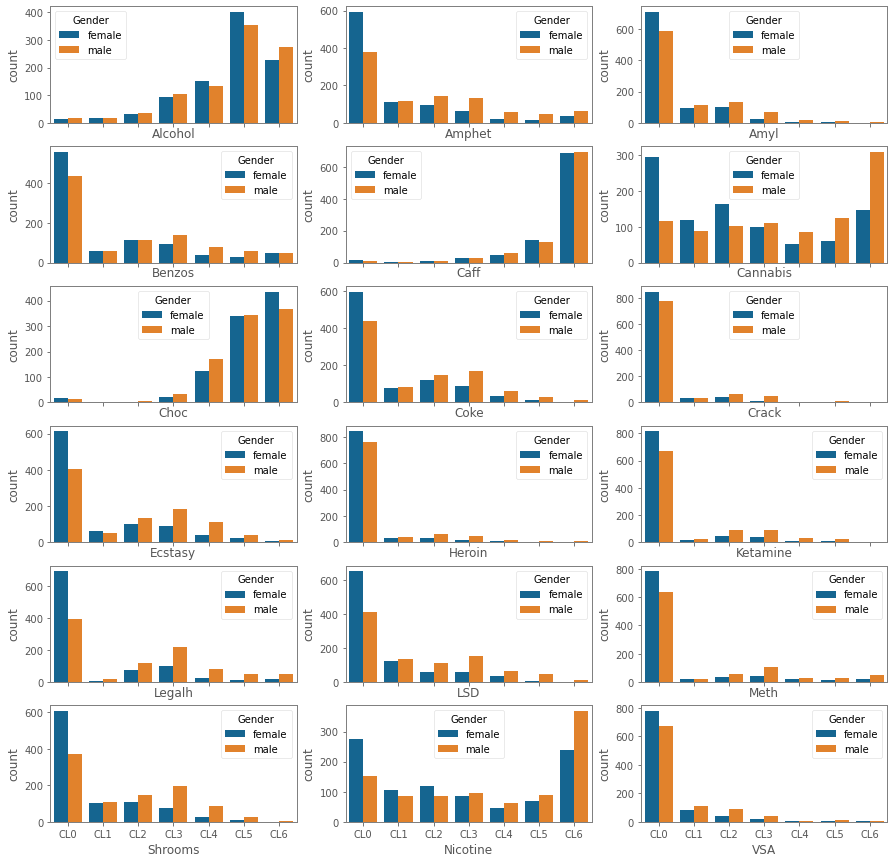

In [1050]:
#get a list with name of drugs
drugs = [name for name in data.select_dtypes(include = ['object']).columns if name not in ['Semer']]
#order categories
order = data_mod2.Alcohol.value_counts().sort_index()

fig, axs = plt.subplots(6,3, sharex= True)
fig.set_figheight(15)
fig.set_figwidth(15)
j = 0
for i, drug in enumerate(drugs):
    if i % 3 == 0:
        j = 0
    sns.countplot(data = data_mod2, x = drug, hue = 'Gender', order = order.index, ax = axs[i//3, j] )
    j += 1


Most drugs have more often never been used by females than by men (category CL0) and more men have used drugs recently (CL6).  Illelag drugs are more frequently consumed by men.

### Age

In [1051]:
data['Age'].unique()

array([ 0.49788, -0.07854, -0.95197,  2.59171,  1.09449,  1.82213])

In [1052]:
data_mod2.replace({'Age':{data['Age'].unique()[0]:'35-44',data['Age'].unique()[1]:'25-34',
                 data['Age'].unique()[2]: '18-24', data['Age'].unique()[3]:'65+',
                 data['Age'].unique()[4]: '45-54', data['Age'].unique()[5]:'55-64'}}, inplace = True)

In [1053]:
fig = px.pie(data_mod2, names = 'Age', title = 'Distribution of age')
fig.update_traces(textposition= 'inside', textinfo = 'percent+label',
                  marker = dict(line = dict(color='black', width= 1)))


The data has a clear bias for younger uses.

Text(0.5, 1.0, 'Distribution of gender in age groups')

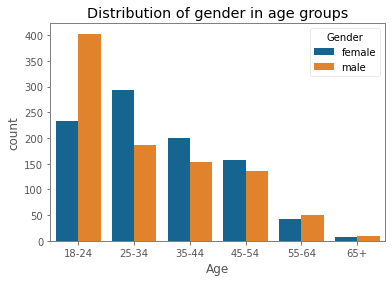

In [1054]:
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
sns.countplot(x = 'Age', hue = 'Gender', data = data_mod2, order = age_order)
plt.title('Distribution of gender in age groups')

Espacially amongst the youngest responders, the age of responders is uneven/skewed between the two genders.  

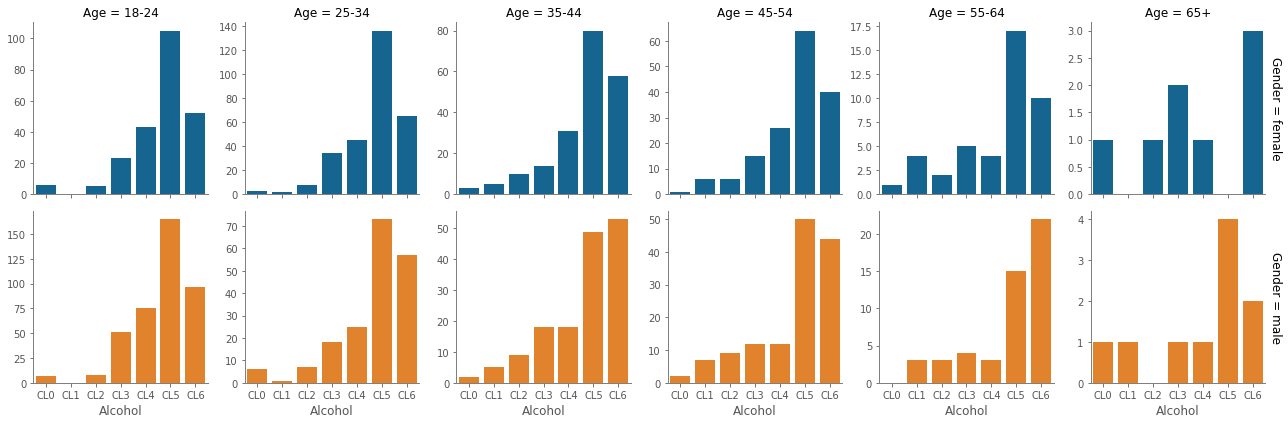

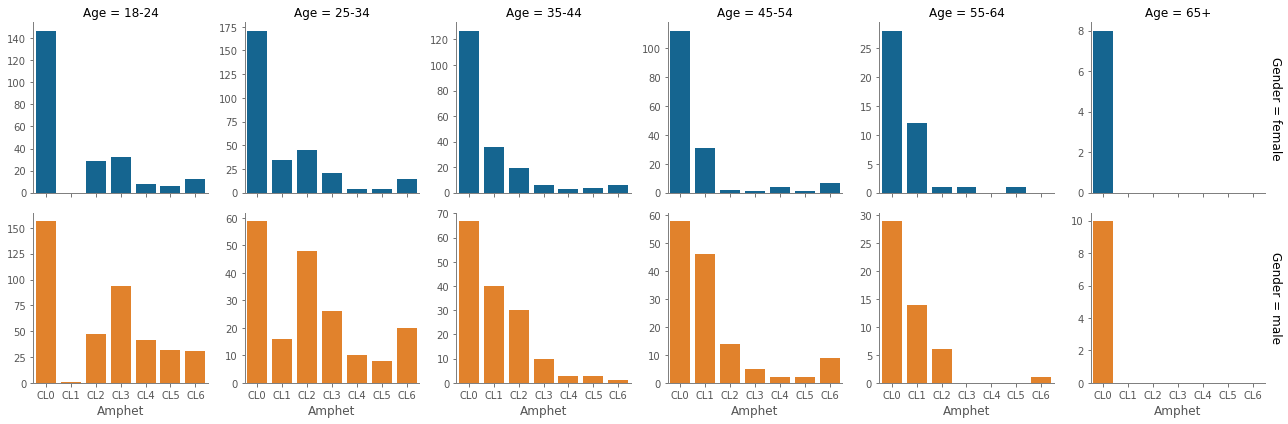

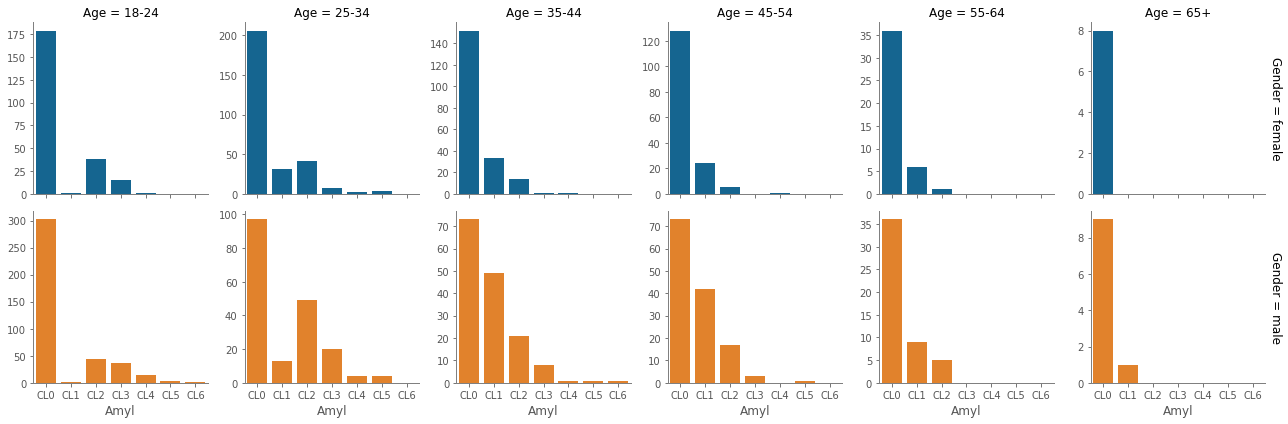

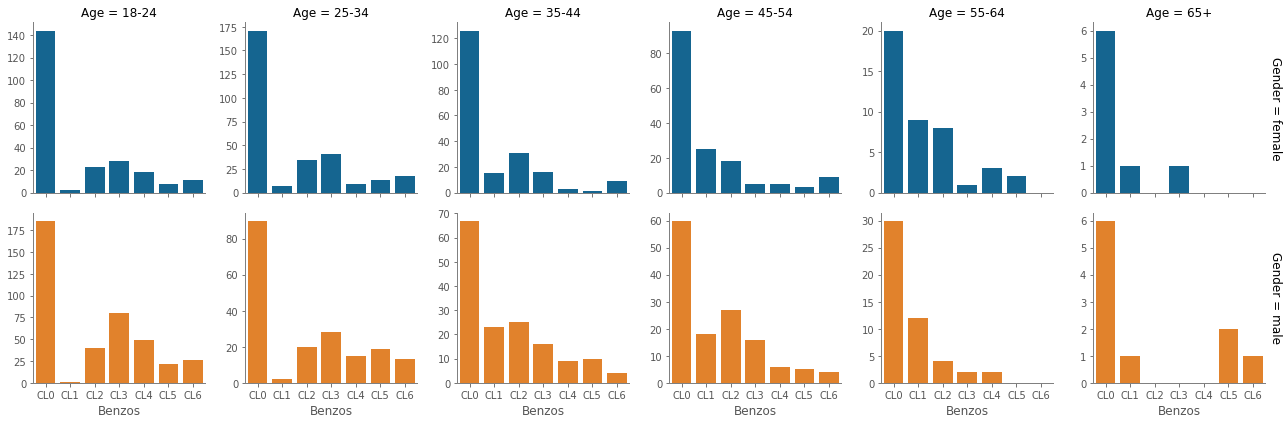

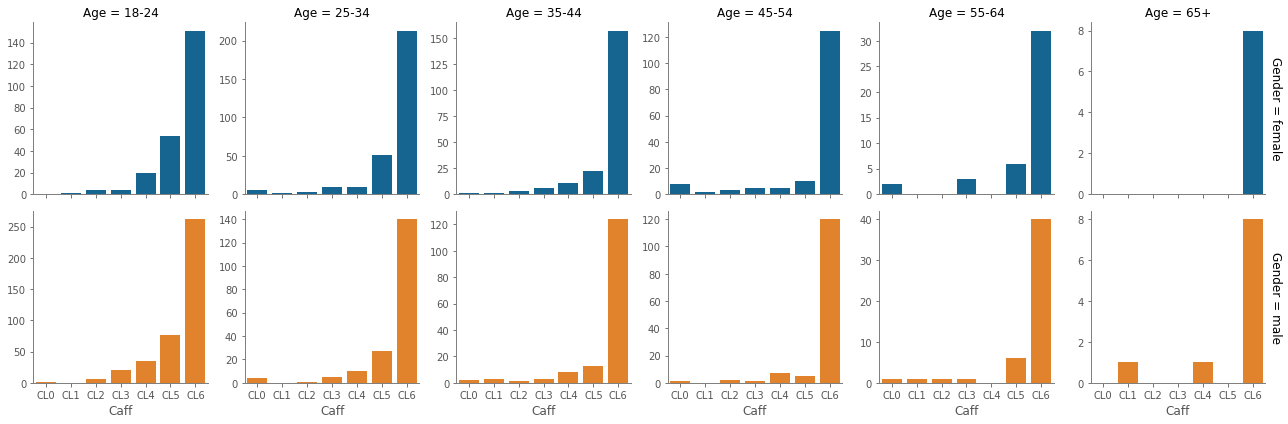

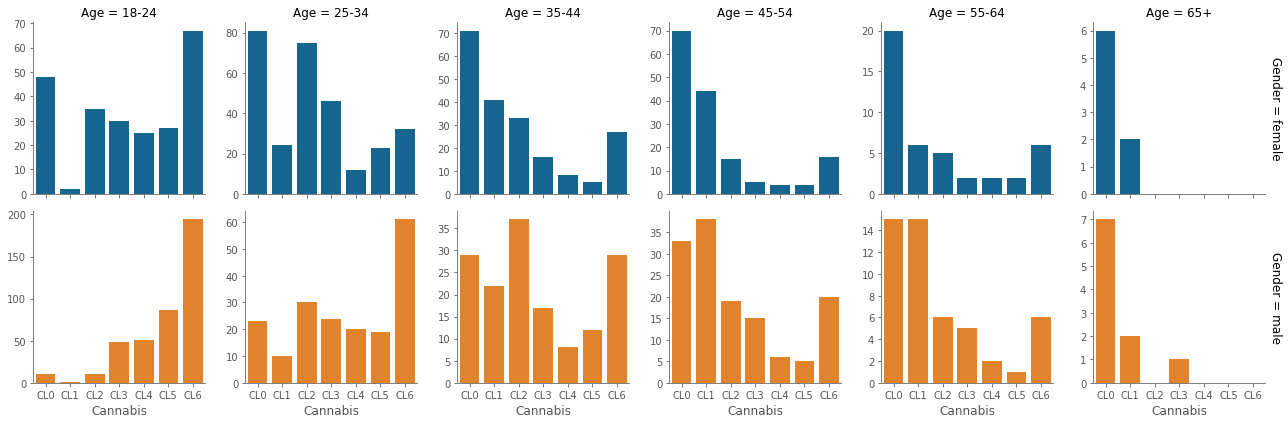

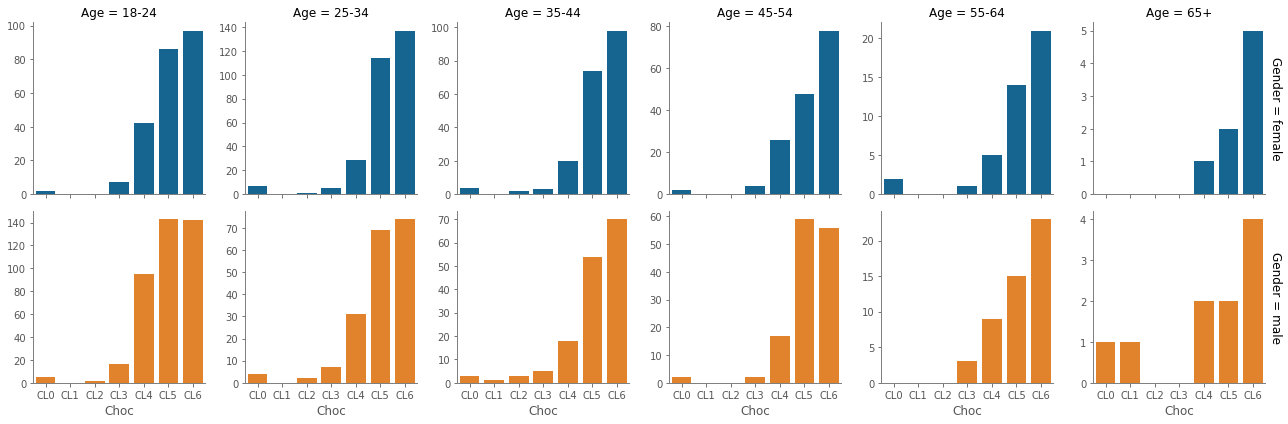

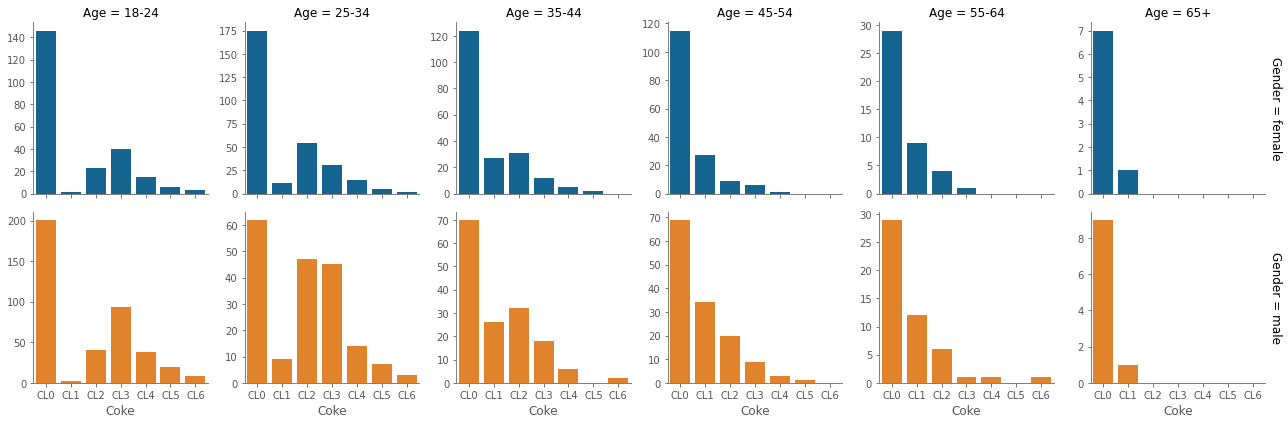

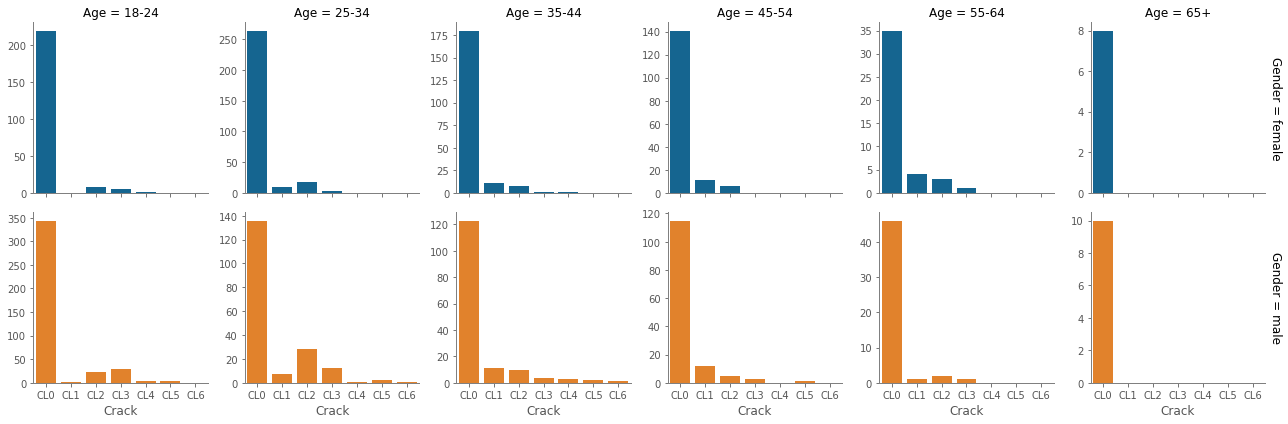

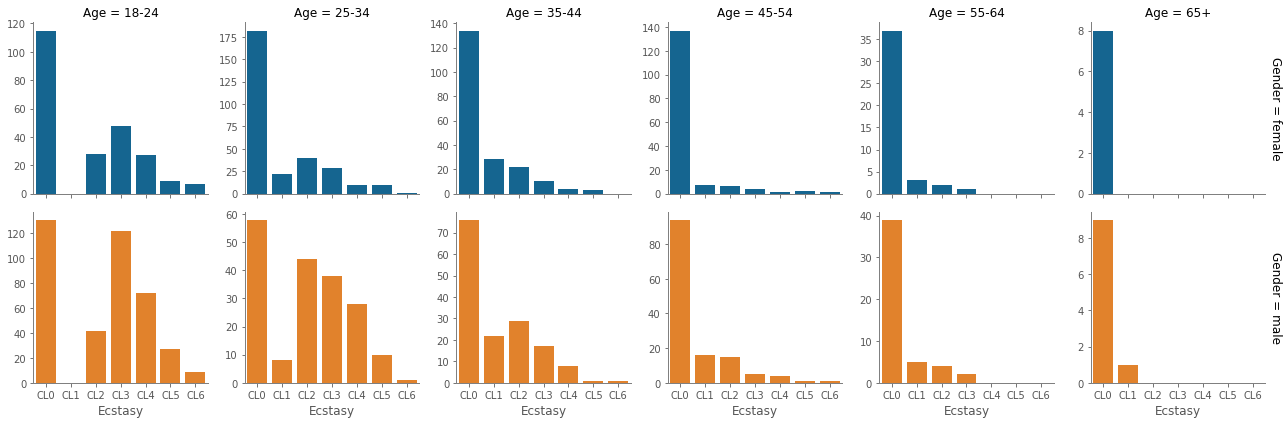

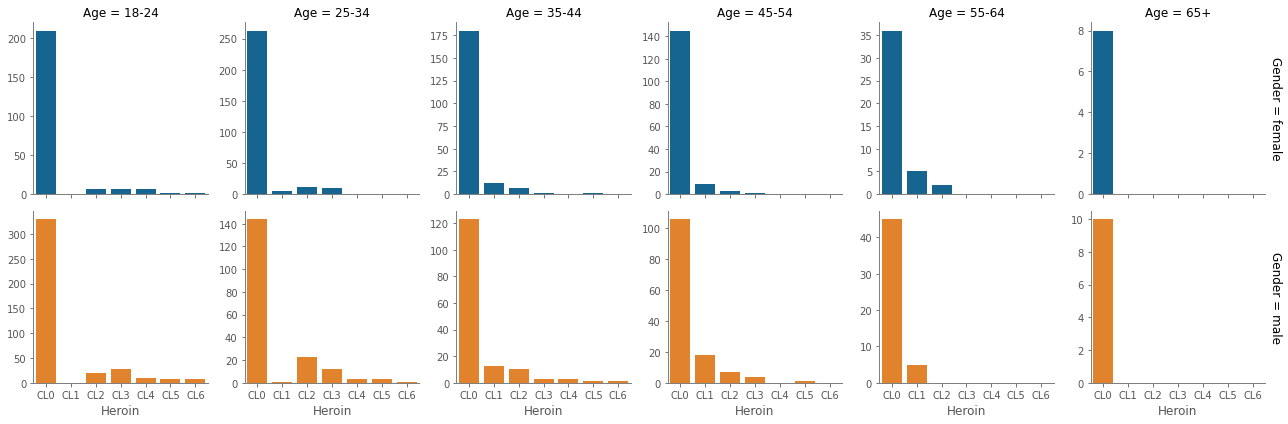

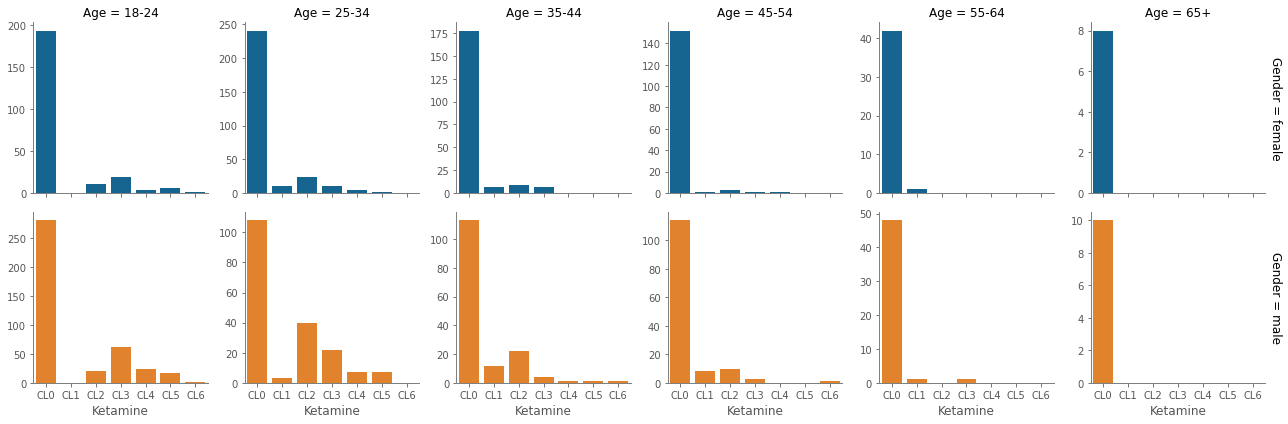

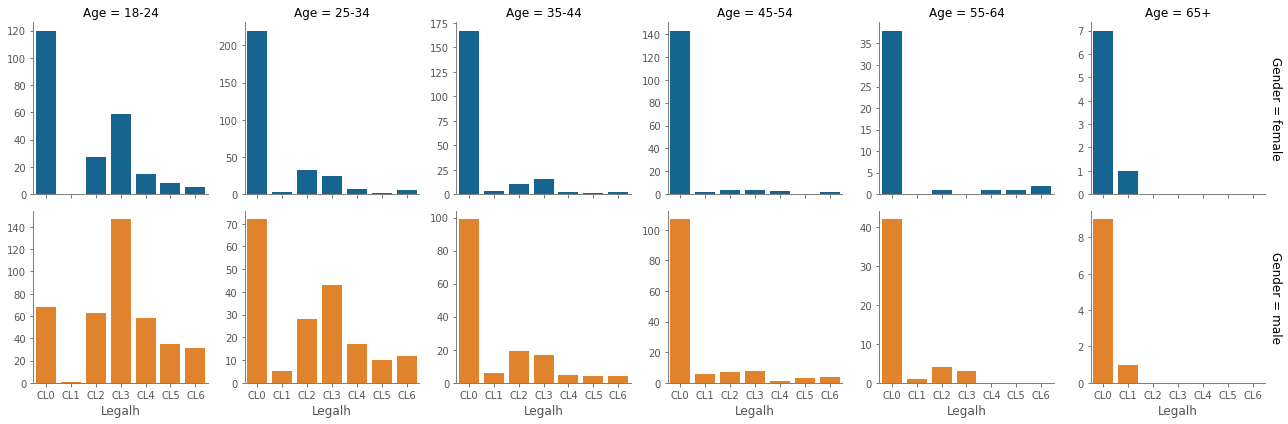

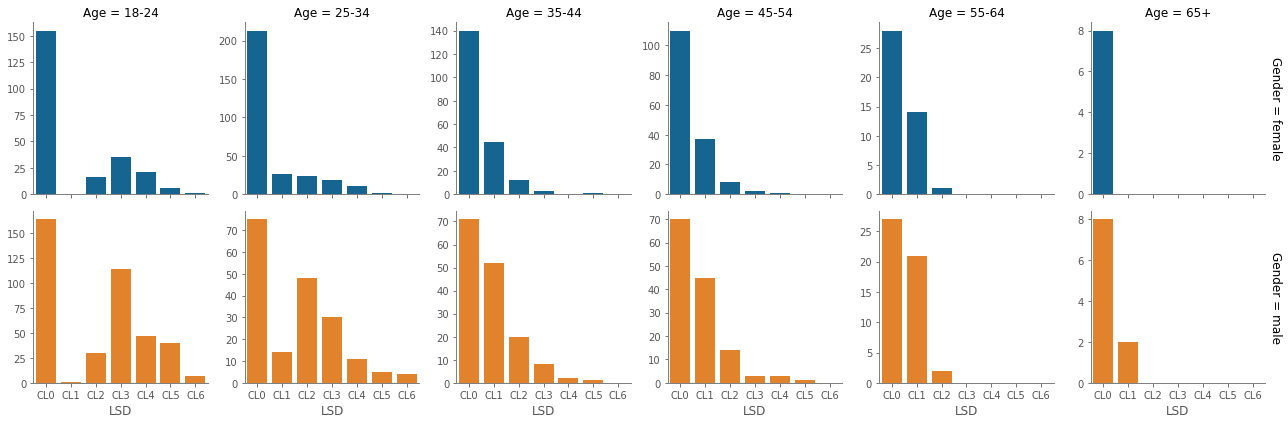

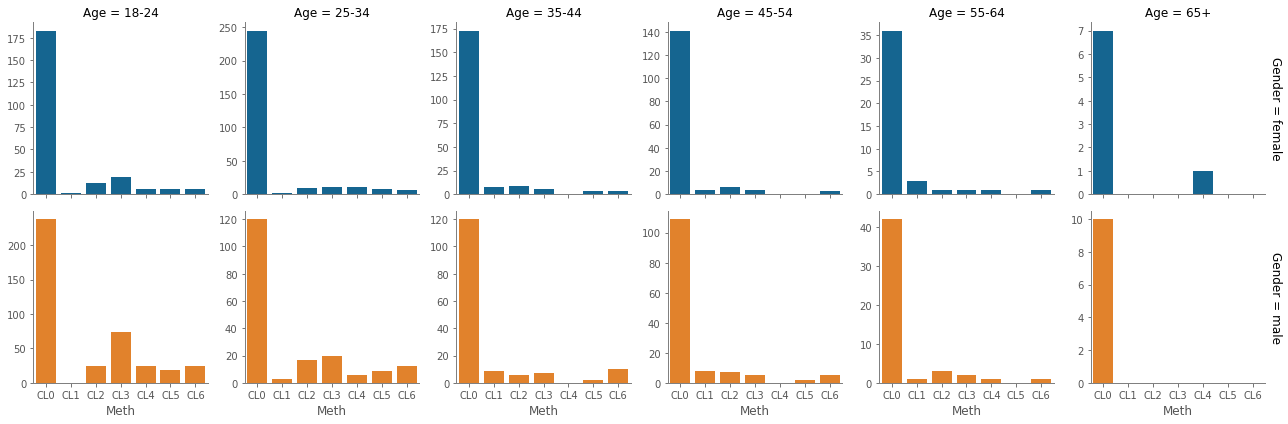

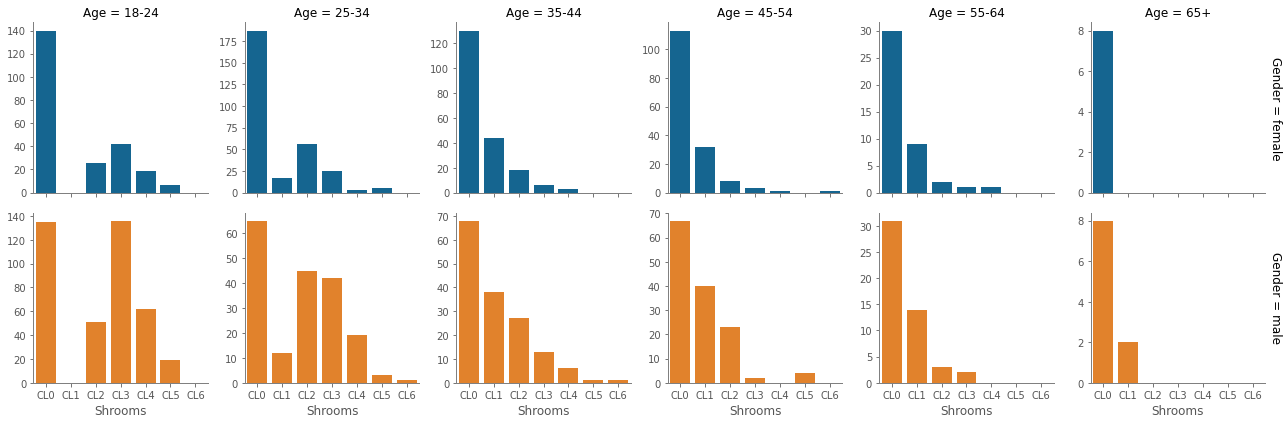

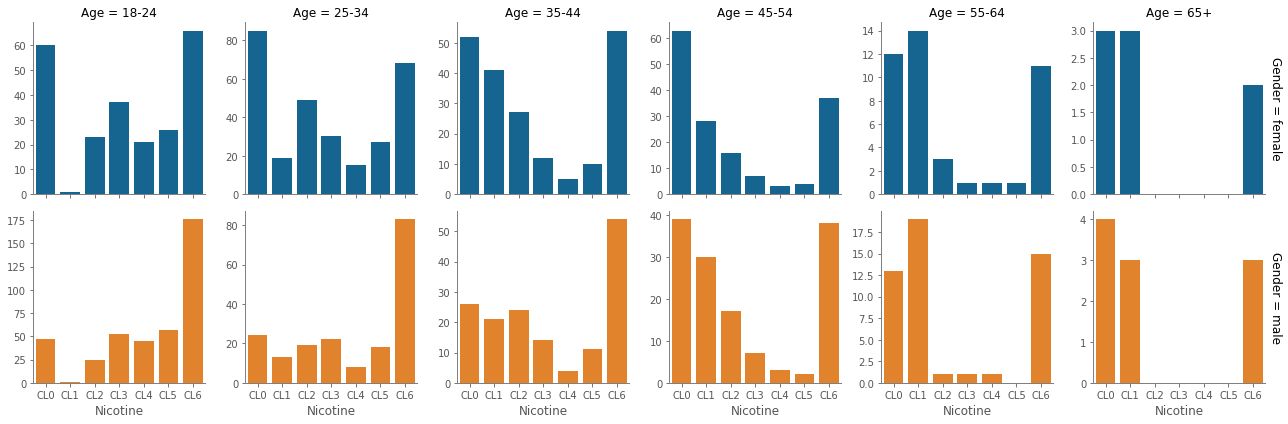

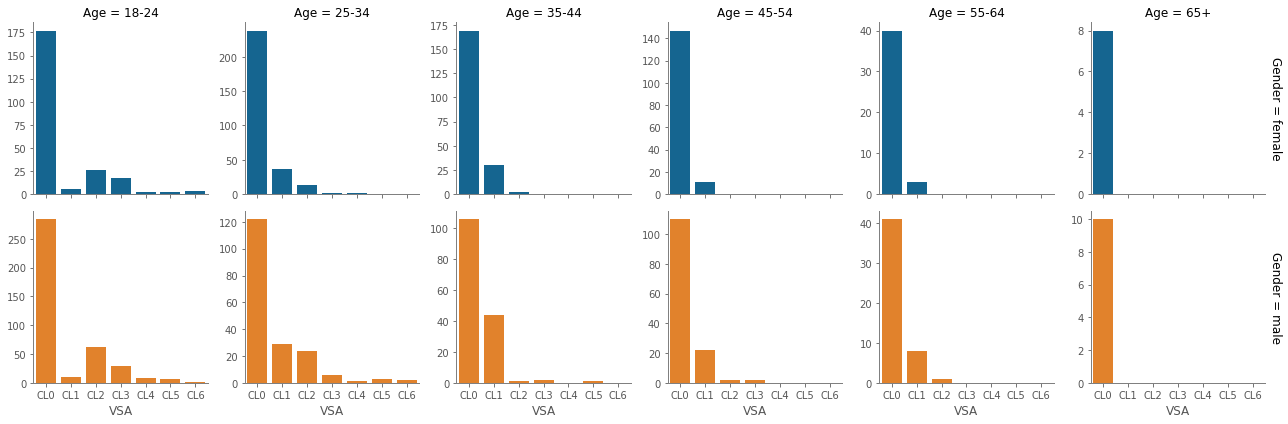

In [1055]:
# check for Gender differences for drug use by age group
# order by age and by frequency of drug use

for drug in drugs:
    p = sns.FacetGrid(data_mod2, col = 'Age',row = 'Gender', hue = 'Gender', 
                      sharey = False, col_order = age_order,margin_titles = True)
    p.map(sns.countplot, drug, order = order.index)
   

Throughout all age groups most people consumed Alcohol, Caffeine or Chocolate recently irespective of the gender.
Nicotine is also commenly used by all responders.  

Almost all illigal drugs have never been consumed by most responders. Younger responders generally have a higher tendency of using these drugs. However, one should keep in mind, that more young people than old people responded. But amongst the older participants, more people than not stated that they have never in there life used these drugs.
  
In general it looks like men are more open to experience with drugs.

### Education

In [1056]:
data_mod['Education'].unique()

array([-0.05921,  1.98437,  1.16365, -1.22751, -1.7379 ,  0.45468,
       -0.61113, -2.43591, -1.43719])

In [1057]:
data_mod2.replace({'Education':{data['Education'].unique()[0]:'prof certificate/diploma',data['Education'].unique()[1]:'doctorate',
                 data['Education'].unique()[2]: 'Master', data['Education'].unique()[3]:'left school at 18',
                 data['Education'].unique()[4]: 'left school at 16', data['Education'].unique()[5]:'University degree',
                 data['Education'].unique()[6]:'uni wo degree', data['Education'].unique()[7]:'left school < 16',
                 data['Education'].unique()[8]:'left school at 17'}}, inplace = True)

In [1058]:
px.pie(data_mod2, names = 'Education').update_traces(textposition= 'inside', textinfo = 'percent+label',
                  marker = dict(line = dict(color='black', width= 1)))

Most responders went to University but did not graduate or have at least a University degree (Bachelor?).

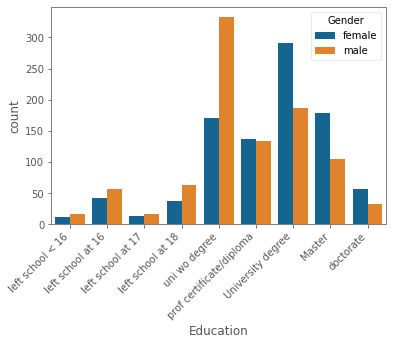

In [1059]:
p = sns.countplot(x = 'Education', hue = 'Gender', data = data_mod2,
              order = ['left school < 16','left school at 16','left school at 17','left school at 18','uni wo degree',
                       'prof certificate/diploma','University degree', 'Master', 'doctorate'])
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right');


### Country

In [1060]:
data_mod.Country.unique()

array([ 0.96082,  0.24923, -0.57009, -0.28519, -0.09765,  0.21128,
       -0.46841])

In [1061]:
data_mod2.replace({'Country':{data['Country'].unique()[0]:'UK',data['Country'].unique()[1]:'Canada',
                 data['Country'].unique()[2]: 'USA', data['Country'].unique()[3]:'Other',
                 data['Country'].unique()[4]: 'Australia', data['Country'].unique()[5]:'Rep of Ireland',
                 data['Country'].unique()[6]:'New Zealand'}}, inplace = True)

In [1062]:
px.pie(data_mod2, names = 'Country', title = 'Country of residence').update_traces(
                  textposition= 'inside', textinfo = 'percent+label',
                  marker = dict(line = dict(color='black', width= 1)))

Most responders have their current residence in the UK. 

### Ethnicity

In [1063]:
data_mod.Ethnicity.unique()

array([ 0.126  , -0.31685,  0.1144 , -0.22166, -0.50212, -1.10702,
        1.90725])

In [1064]:
data_mod2.replace({'Ethnicity':{data['Ethnicity'].unique()[0]:'White/Asian',data['Ethnicity'].unique()[1]:'White',
                 data['Ethnicity'].unique()[2]: 'other', data['Ethnicity'].unique()[3]:'White/Black',
                 data['Ethnicity'].unique()[4]: 'Asian', data['Ethnicity'].unique()[5]:'Black',
                 data['Ethnicity'].unique()[6]:'Black/Asian'}}, inplace = True)

In [1065]:
px.pie(data_mod2, names = 'Ethnicity', title = 'Distribution of Ethnicity').update_traces(
                  textposition= 'inside', textinfo = 'percent+label',
                  marker = dict(line = dict(color='black', width= 1)))

Almost all responders are white. Needs to be checked whether the residencence is a usefull feature for prediction.

In [1066]:
data_mod_eth = data_mod2.copy()
#convert categorial values for drugs to numerical values 
data_mod_eth.replace(to_replace=['CL0', 'CL1','CL2', 'CL3', 'CL4', 'CL5', 'CL6'], value=[0,1,2,3,4,5,6], inplace=True)
#calculate the mean as an estimate of average usage
eth_group = pd.pivot_table(data_mod_eth, index = 'Ethnicity' )
eth_group[drugs].round(2)


,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA
Ethnicity,,,,,,,,,,,,,,,,,,
Asian,2.68,0.64,0.20,0.92,4.88,0.96,4.80,0.40,0.12,0.68,0.16,0.28,0.36,0.40,0.04,0.44,2.00,0.56
Black,4.00,0.27,0.00,0.45,4.36,1.30,4.70,0.48,0.18,0.36,0.12,0.18,0.64,0.12,0.15,0.27,1.76,0.03
Black/Asian,4.33,0.00,0.00,3.00,5.33,5.33,6.00,1.00,0.00,0.33,0.00,0.00,1.67,3.33,1.00,2.67,3.33,1.33
White,4.68,1.34,0.62,1.45,5.52,3.00,5.13,1.15,0.29,1.32,0.37,0.57,1.36,1.05,0.83,1.18,3.22,0.42
White/Asian,4.90,1.90,0.20,2.40,5.65,3.65,4.45,1.80,0.60,1.55,0.95,0.60,1.25,1.50,1.55,1.70,3.30,0.70
White/Black,4.95,1.58,0.79,1.74,5.37,2.63,5.21,1.32,0.47,1.11,0.63,0.53,1.68,0.84,1.00,0.89,3.68,0.42
other,4.47,1.98,0.71,2.21,5.37,3.85,4.94,1.68,0.47,1.81,0.50,0.66,2.00,1.58,0.97,1.63,3.68,0.68


Without considering numbers, just by looking at the means:  
"Asians" drink slightly less than whites.    
"Others" take Amphet more often.  
"Black/Asian" have the highest tendency to take Benzos.  
"Asians" and "Blacks" consume less cannabis.  
"Asians" and "Blacks" use less cocaine less frequently than others.  
"Black/Asian" and "Blacks" consume less ecstasy.   
"Other" uses lagal highs more often than other ethnicities.  
"Black/Asians" have a much higher tendency to use LSD.   
"Asian" and "Black" hardly ever use meth.  
"Black/Asian" consume more shrooms than others.  
"Blacks" have the lowest tendency to smoke.

In [1067]:
eth_group = pd.pivot_table(data_mod_eth, index = 'Ethnicity', aggfunc = 'max'  )
eth_group[drugs]

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA
Ethnicity,,,,,,,,,,,,,,,,,,
Asian,6,6,2,6,6,6,6,4,1,5,2,3,2,5,1,4,6,4
Black,6,5,0,4,6,6,6,5,6,4,4,3,6,3,5,4,6,1
Black/Asian,5,0,0,6,6,6,6,3,0,1,0,0,5,5,3,4,6,4
White,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
White/Asian,6,5,2,6,6,6,6,6,3,5,5,3,3,4,6,5,6,3
White/Black,6,6,5,6,6,6,6,6,4,4,5,5,6,6,6,3,6,4
other,6,6,5,6,6,6,6,6,3,5,5,5,6,6,6,6,6,6


Problem with low number count of some ethnicities:  
Not a single user of 'Amphetamines' among Black/Asian.  
No Amyl nitrite users among Blacks and Black/Asians.  
No Crack users among Black/Asians (and Asians if we consider CL1 as never used).  
Black/Asian responders have only used ecstasy more than a decade ago. 
  
All drugs with a max score of 1 for a given ethnicity means that the drug has not been used by this group in the last decade and is thus considered as non user.

<AxesSubplot:>

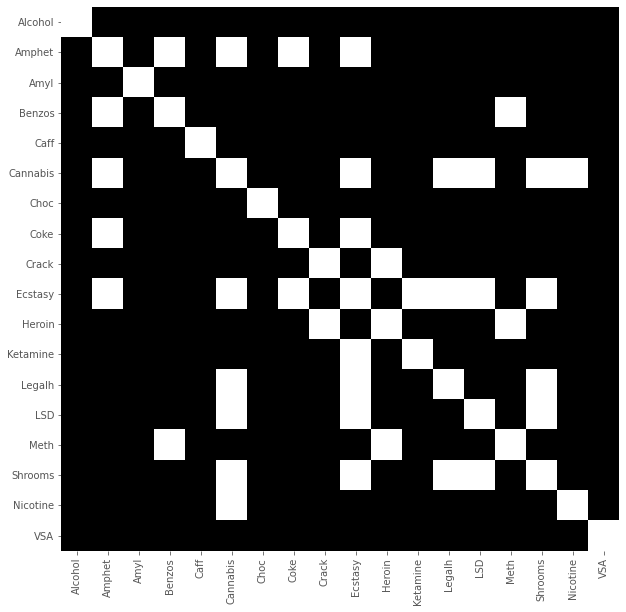

In [1068]:
# look for correlation of drug use
plt.figure(figsize = (10,10))
# plot white 
sns.heatmap(data_mod_eth[drugs].corr(method = 'spearman')>0.5, cmap = 'cubehelix', cbar = False)

This looks interesting and clearly use of some drugs is correlated. Of note, legal drugs are not associated with use of illegal drugs in this dataset, except for nicotine and cannabis (when using the chosen cut off). A correlation is evident for Heroin, Crack and Methadone. Amphetamine use correlates with use of ecstasy, cocaine, cannabis, benzos.

# What are personality traits associated with drug use?

In total the data set contains 7 differnet categories for each drug spanning different periods of usage ranging from never used to used last day. In terms of addiction there is a clear differnece between someone who has used a certain drug in the last decade and someone who has used the drug in the last month or more often. We therefore catagorize an "active drug user" as someone who has used a given drug in the last month or more often.
We can envision the following categories:  
  
never used: CL0, CL1 (we allow used over a decade ago)     
used rarely: CL2, CL3  
active user: CL4, CL5, CL6   

In [1069]:
# make a list of personality traits 
traits = [col for col in data.columns if 'score' in col] + ['SS', 'Impulsive']

In [1070]:
# we label active users as responders who have consumed drugs at least last month
# from now on use the dataset in which only the Semeron users have been removed
user_criterion = ['CL4', 'CL5', 'CL6']

# create a heroin user dataframe
heroin_user = data_mod[data_mod['Heroin'].isin(user_criterion)]

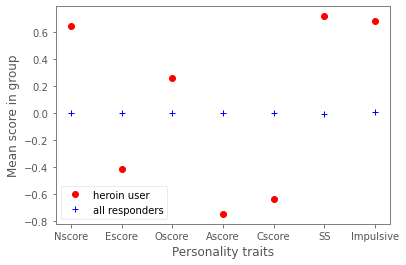

In [1102]:
# calculate the main personality trait scores of Heroin users
b = heroin_user[traits].mean()
# calculate the main personality trait scores of all responders
c = data_mod[traits].mean()
# plot mean personality metric scores 
plt.plot(traits, b, 'ro', label = 'heroin user')
plt.plot(traits, c, 'b+', label ='all responders')
plt.xlabel('Personality traits')
plt.ylabel('Mean score in group')
plt.legend()


In [1072]:
# get mean score for all personality scores after filtering for active users
# and get number of active users for each drug
active_user = []
active_user_mean = {}
for drug in drugs:
    # filter out active users for each drug
    user = data_mod[data_mod[drug].isin(user_criterion)]
    # add drug and number of active users in active_user list
    active_user.append((drug, user.shape[0]))
    #fill dictionary with drug name (key) and mean scores of personaliyt traits for the given drug
    active_user_mean[drug] = user[traits].mean()

# sort list of active_users according to number of users
active_user.sort(key = lambda x: x[1])


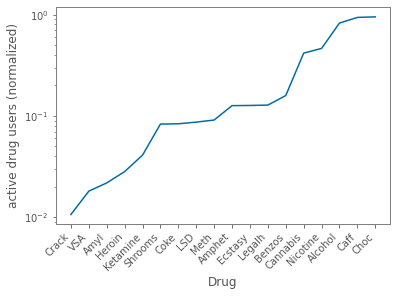

In [1073]:
# plot normalized numbers of active users
active_drug = [drug for drug, number in active_user]
active_drug_count = [number/data_mod.shape[0] for drug, number in active_user]
plt.plot(active_drug, active_drug_count)
plt.yscale('log')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.xlabel('Drug')
plt.ylabel('active drug users (normalized)')
plt.show()

Chocolate, caffeine, alcohol are the most consumed drugs. That is expected as these are the legal drugs. Canabis is the most used illegal drug. 

### How many illelag drugs are people taking at a time

In [1120]:
# create a list with illegal drugs
illegal_drugs = [drug for drug in drugs if drug not in ['Alcohol', 'Choc', 'Caff']]
legal_drugs = [drug for drug in drugs if drug not in illegal_drugs]

['Alcohol', 'Caff', 'Choc']

Text(0.5, 1.0, 'Number of illegal drugs used by responders')

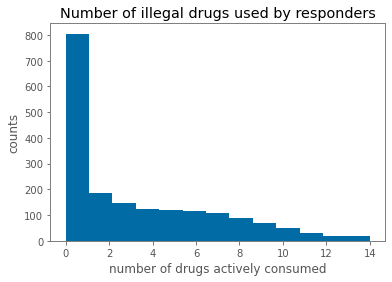

In [1215]:
data_mod22 = data_mod2.copy()
data_mod22.replace(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], [0,0,0,1,1,1,1,], inplace = True)
# drop traits
data_mod22.drop(traits + ['Age', 'Gender', 'Education', 'Country', 'Ethnicity'], axis = 1, inplace = True)
#drop legal_drugs
data_mod22.drop(legal_drugs, axis = 1, inplace = True)
# count number of illegal drugs responders are consuming 
data_mod22['illegal_drugs_used'] = data_mod22.sum(axis = 1)
plt.figure()
data_mod22['illegal_drugs_used'].hist(bins = 13)
plt.xlabel('number of drugs actively consumed')
plt.ylabel('counts')
plt.title('Number of illegal drugs used by responders')

### Do personality traits differ for different drug users?

In [1074]:
active_drug_mean_scores = [active_user_mean[drug] for drug in active_drug]

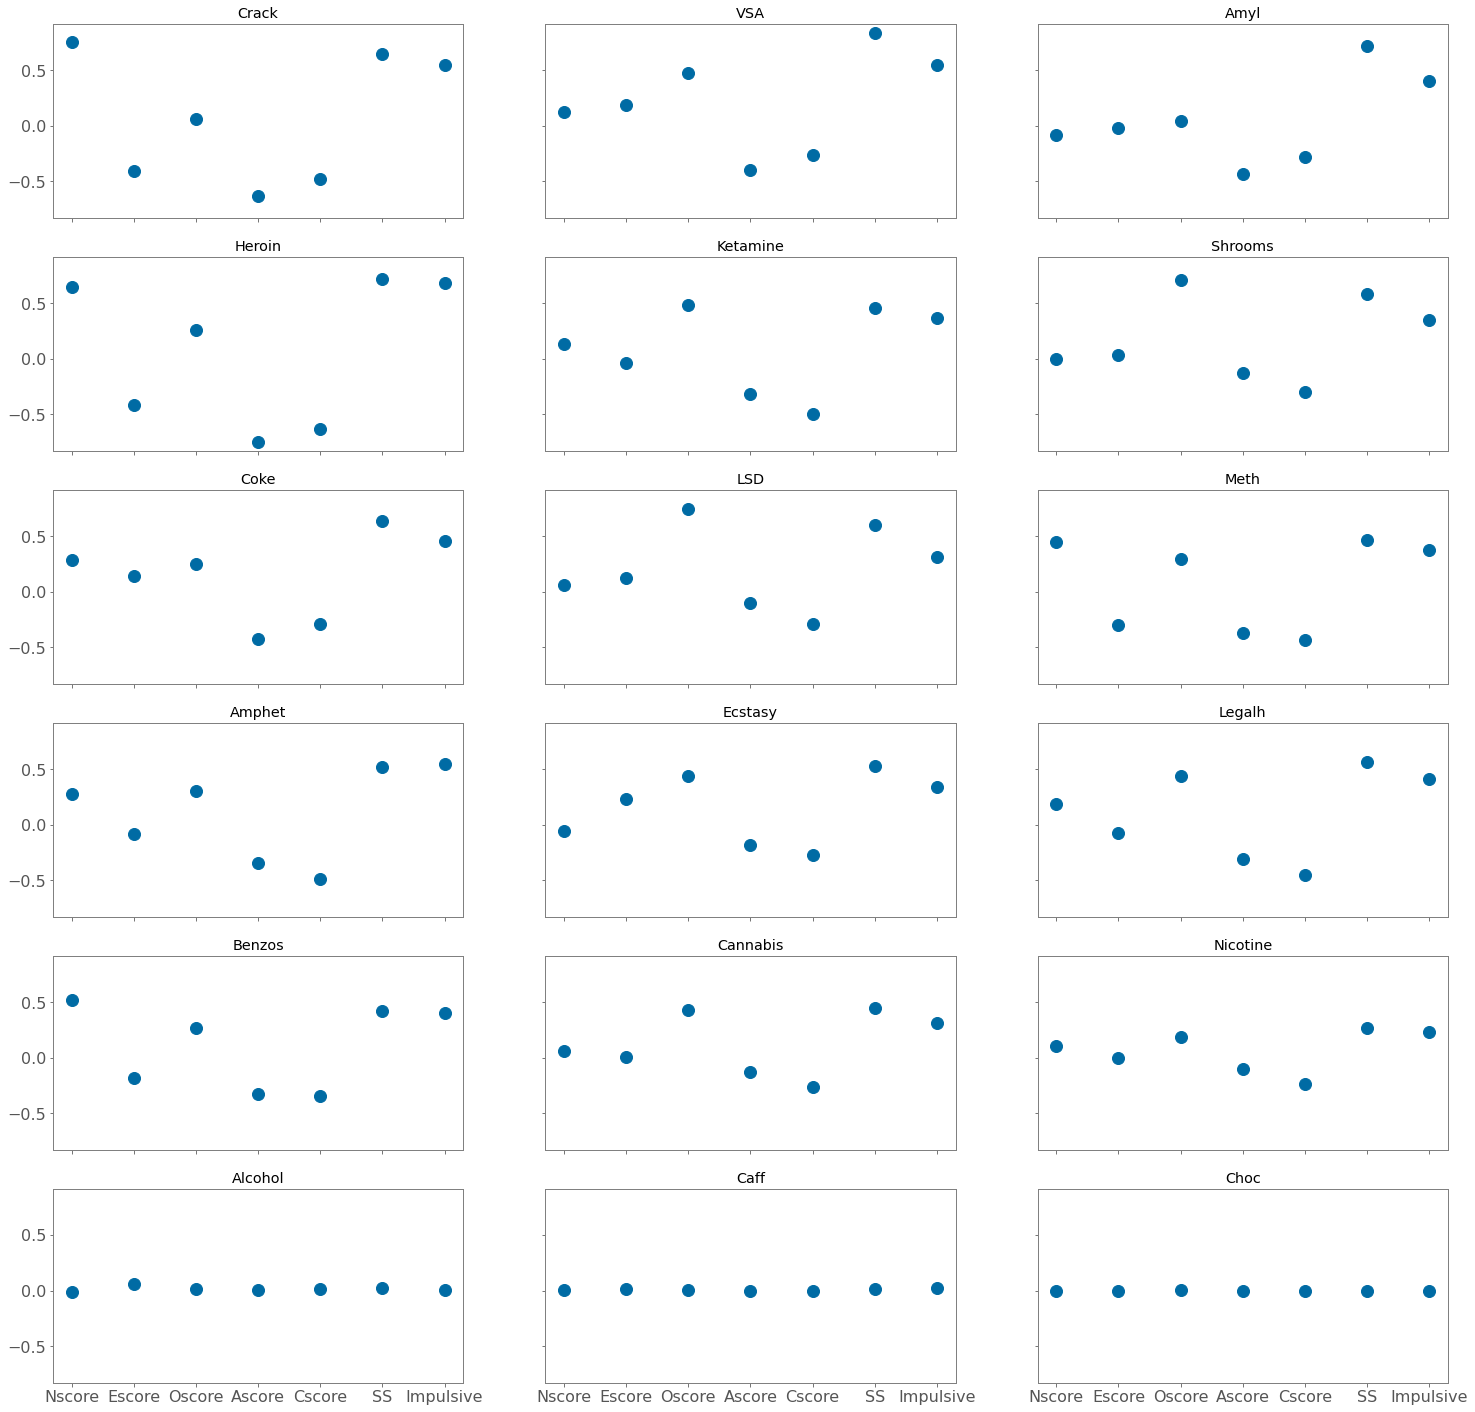

In [1075]:
fig, axs = plt.subplots(6,3, sharex = True, sharey = True)
fig.set_figheight(25)
fig.set_figwidth(25)

j = 0
for i, drug in enumerate(active_drug):
    if j % 3 == 0:
        j = 0
        
    axs[i//3, j].plot(traits, active_user_mean[drug], 'o', markersize = 12 )
    axs[i//3, j].set_title(f'{drug}')
    axs[i//3, j].tick_params(axis = 'both', labelsize = 16 )
    j+=1

# Add data interpretation here

In [1076]:
# can we increase numbers of active drug users by groupging data, e.g. combining some drugs?
# some drugs are used by different groups and during different occasions
# Ecstasy and LSD are party drugs
# Heroin, Crack, Methadon are quite bad drugs that are only used by very few peoply

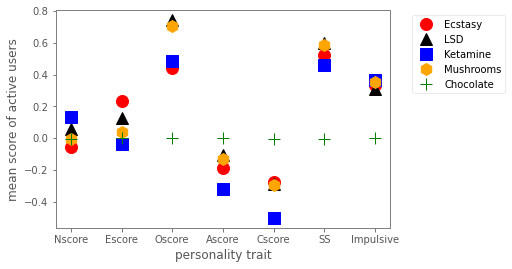

In [1077]:
# Do LSD and Ecstasy consumers have similar personalities?
plt.plot(traits, active_user_mean['Ecstasy'], 'o', color = 'red', markersize = 12, label = 'Ecstasy')
plt.plot(traits, active_user_mean['LSD'], '^', color = 'black', markersize = 12, label = 'LSD')
plt.plot(traits, active_user_mean['Ketamine'], 's', color = 'blue', markersize = 12, label = 'Ketamine')
plt.plot(traits, active_user_mean['Shrooms'], 'h', color = 'orange', markersize = 12, label = 'Mushrooms')
plt.plot(traits, active_user_mean['Choc'], '+', color = 'green', markersize = 12, label = 'Chocolate')
plt.xlabel('personality trait')
plt.ylabel('mean score of active users')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

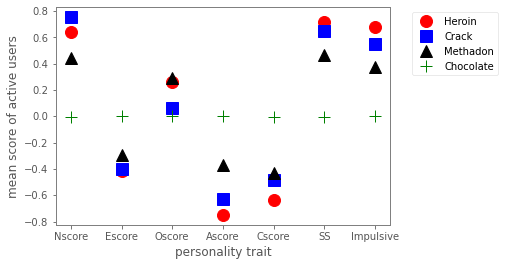

In [1078]:
#Crack, Heroin and Methadon users
plt.plot(traits, active_user_mean['Heroin'], 'o', color = 'red', markersize = 12, label = 'Heroin')
plt.plot(traits, active_user_mean['Crack'], 's', color = 'blue', markersize = 12, label = 'Crack')
plt.plot(traits, active_user_mean['Meth'], '^', color = 'black', markersize = 12, label = 'Methadon')
plt.plot(traits, active_user_mean['Choc'], '+', color = 'green', markersize = 12, label = 'Chocolate')
plt.xlabel('personality trait')
plt.ylabel('mean score of active users')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

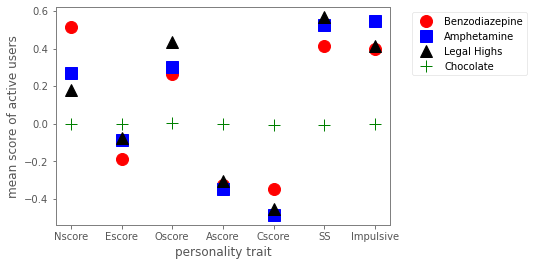

In [1079]:
#Benzos, Legalh, Amphetamine consumers
plt.plot(traits, active_user_mean['Benzos'], 'o', color = 'red', markersize = 12, label = 'Benzodiazepine')
plt.plot(traits, active_user_mean['Amphet'], 's', color = 'blue', markersize = 12, label = 'Amphetamine')
plt.plot(traits, active_user_mean['Legalh'], '^', color = 'black', markersize = 12, label = 'Legal Highs')
plt.plot(traits, active_user_mean['Choc'], '+', color = 'green', markersize = 12, label = 'Chocolate')
plt.xlabel('personality trait')
plt.ylabel('mean score of active users')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Do people who use drugs at different intervals have different personality traits?

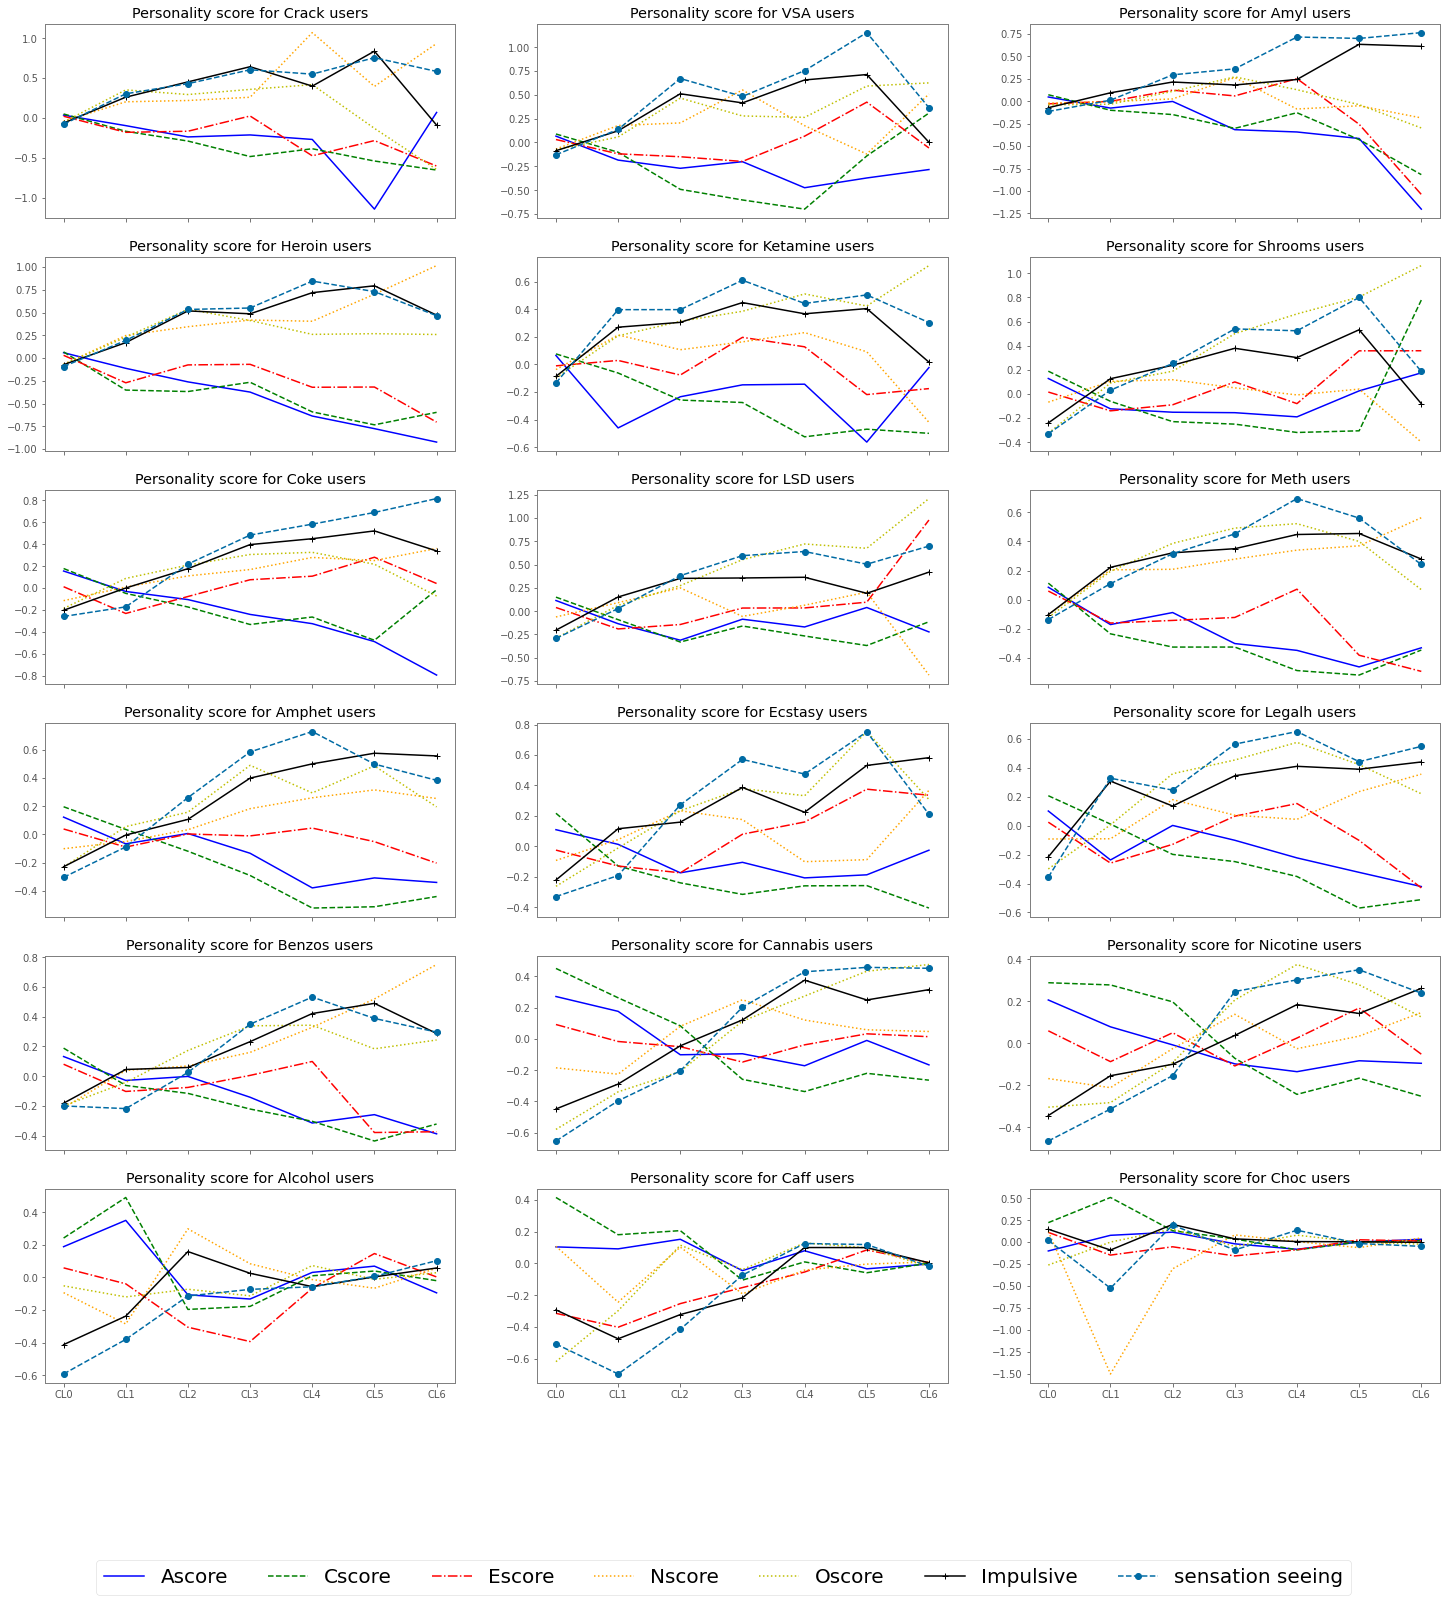

In [1212]:
fig = plt.figure()
axs = fig.subplots(6,3, sharex = True)
fig.set_figheight(25)
fig.set_figwidth(25)
j =0
for i, drug in enumerate(active_drug):
    if j % 3 == 0:
        j = 0
    a = pd.pivot_table(data = data_mod, index = drug, aggfunc = 'mean')

    axs[i//3,j].plot(a.index, a.Ascore, 'b-', label = 'Ascore')
    axs[i//3,j].plot(a.index, a.Cscore, 'g--', label = 'Cscore')
    axs[i//3,j].plot(a.index, a.Escore, 'r-.', label = 'Escore')
    axs[i//3,j].plot(a.index, a.Nscore, ':', color = 'orange', label = 'Nscore')
    axs[i//3,j].plot(a.index, a.Oscore, 'y:', label = 'Oscore')
    axs[i//3,j].plot(a.index, a.Impulsive, 'k+-', label = 'Impulsive')
    axs[i//3,j].plot(a.index, a.SS, 'o--', label = 'sensation seeing')
    axs[i//3, j].set_title(f'Personality score for {drug} users')
    #axs[i,j].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    #axs[i,j].title(f'Mean scores of Personality traits for "{drug}" users')
    j += 1

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    
fig.legend(lines[:7], labels[:7], loc = 'lower center', ncol =7, fontsize = 20)
plt.show()


* NScore: neuroticism (resilient/confident vs. sensitive/nervous)  
* Escore: extraversion (solitary/reserved vs. outgoing/energetic)  
* Oscore: openeness to experience (consistent/cautious vs. inventive/curious)  
* Ascore: agreeableness (challenging/callous vs. friendly/compassionate)  
* Cscore: conscientiousness (extravagant/careless vs. efficient/organized) 

# add data interpretation here 

__Note: Due to t-statistic transformation, the mean for the whole dataset is close to 0 for all scores__  
  
the personality traits from active alcohol, caffeine and chocolate users don't differ from those of the whole dataset. This was expected as the majority of people use these substances. For nicotine, the differences are only moderate.   
  
For most illelag drugs the mean score of at least one trait deviates by at least 0.5 units from the sample mean.



__Should we only pick some drugs?__  
  
legal drugs?     
tranquilizer (benzos)?  
canabis  
club drugs (ecstasy, amphetmaine, ketamine)?  




<AxesSubplot:>

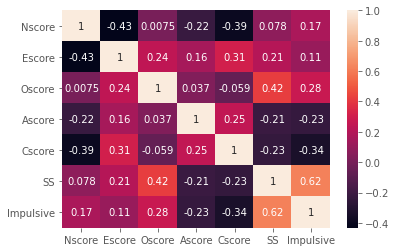

In [1081]:
# identify correlations of personality trait scores
corr = data_mod_eth[traits].corr()
sns.heatmap(corr, annot = True)

In [1082]:
# identify power users who have used almost all drugs
power_user = data_mod[data_mod['Heroin'].isin(user_criterion) & data_mod['Amphet'].isin(user_criterion) & 
                     data_mod['Meth'].isin(user_criterion) & data_mod['Coke'].isin(user_criterion) & 
                     data_mod['LSD'].isin(user_criterion) & data_mod['Ketamine'].isin(user_criterion) & 
                     data_mod['Ecstasy'].isin(user_criterion) & data_mod['Alcohol'].isin(user_criterion) & 
                     data_mod['Nicotine'].isin(user_criterion) & data_mod['Benzos'].isin(user_criterion)] 
power_user.shape

(2, 31)

In [1083]:
power_user

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
882,-0.95197,0.48246,-2.43591,-0.57009,-0.31685,0.62967,-0.15487,0.88309,-0.45321,-1.38502,0.19268,1.92173,CL5,CL4,CL0,CL4,CL5,CL6,CL5,CL5,CL0,CL5,CL4,CL4,CL4,CL4,CL4,CL4,CL5,CL0,CL3
1363,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,0.82562,-1.09207,0.58331,0.76096,-1.13788,0.88113,-0.52593,CL6,CL6,CL0,CL5,CL5,CL4,CL5,CL4,CL0,CL4,CL4,CL5,CL6,CL5,CL5,CL4,CL4,CL0,CL0


In [1084]:
# find people that have never used most drugs
abstinents = data_mod[data_mod['Heroin'].isin(['CL0'])& data_mod['Alcohol'].isin(['CL0'])& data_mod['Caff'].isin(['CL0'])&
                      data_mod['Nicotine'].isin(['CL0'])]
abstinents.shape

(2, 31)

In [1085]:
abstinents

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
389,-0.07854,-0.48246,0.45468,0.96082,-1.10702,-1.32828,0.32197,-0.58331,-1.34289,2.04506,-0.71126,0.07987,CL0,CL0,CL0,CL0,CL0,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
1281,-0.95197,-0.48246,0.45468,0.96082,-0.50212,0.82562,0.63779,-0.84732,-2.21844,0.93949,1.86203,1.92173,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0


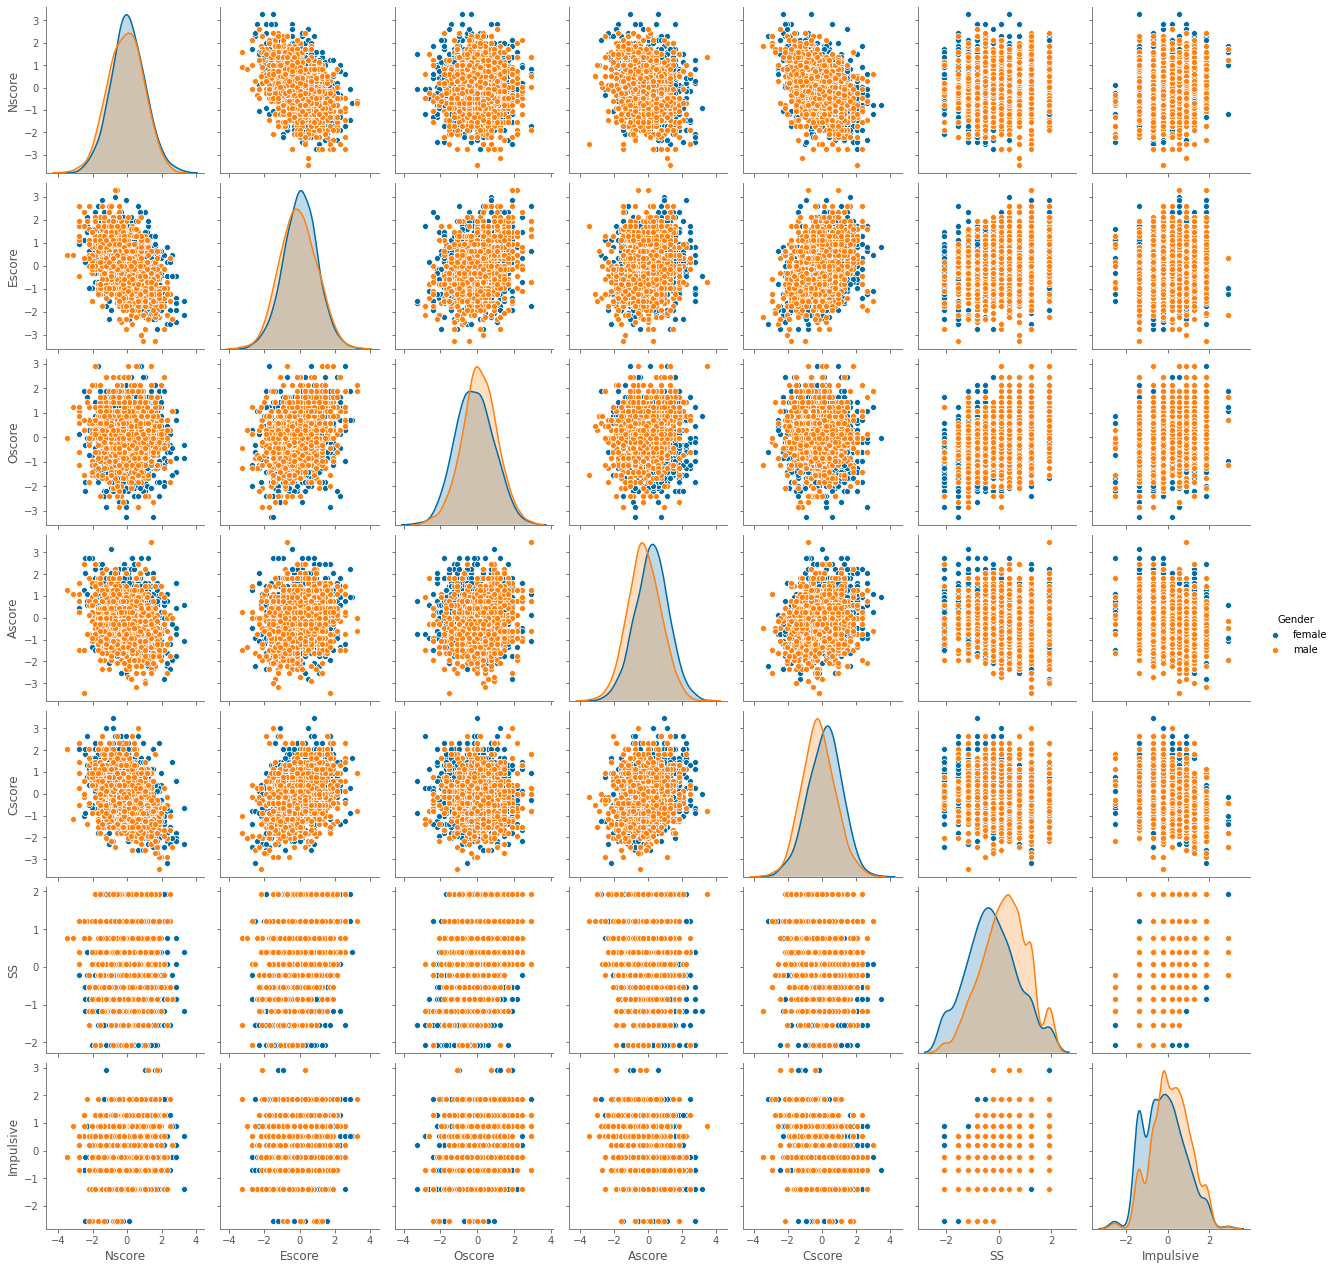

In [1086]:
sns.pairplot(data_mod_eth[traits + ['Gender']], hue = 'Gender')

# Modeling data

In [1087]:
# import modules
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

We will start with testing some models to predict the alcohol risk. We will group the data into two categories. As alcohol is a legal drug we only consider people who have consumed 'alcohol' on the last day or during the last week:

* Class 0: CL0-CL4
* Class 1: CL5 + CL6

In [1374]:
# function to add 
def label_drug(row, drug):
    if row[drug] in ['CL0', 'CL1', 'CL2', 'CL3', 'CL4']:
        return 0
    else:
        return 1
    return 'ERROR'

In [1375]:
data_mod['alcohol_user'] = data_mod.apply(lambda row: label_drug(row, 'Alcohol'), axis = 1)

In [1376]:
data_mod.head(2)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA,alcohol_user
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,1
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,1


In [1450]:
# As SS and Impulsive are not independent from each other, I will drop Impulsive
data_lr = data_mod.copy()
#data_lr = data_lr.drop('Impulsive', axis = 1)
X_lr = data_lr.iloc[:,0:12] .values
y_lr = data_lr['alcohol_user'].values
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size = 0.4, random_state = rseed, shuffle = True, 
                                                    stratify = y_lr)

In [1451]:
# compare to dummy classifier that predicts only most frequent class
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = 'most_frequent')

y_train_dummies = cross_val_predict(dummy_clf, X_train, y_train, cv = 5)
print(metrics.confusion_matrix(y_train,y_train_dummies))
print(metrics.classification_report(y_train,y_train_dummies))

[[  0 370]
 [  0 756]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       370
           1       0.67      1.00      0.80       756

    accuracy                           0.67      1126
   macro avg       0.34      0.50      0.40      1126
weighted avg       0.45      0.67      0.54      1126



/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Logistic Regression

In [1452]:
LogReg_clf = LogisticRegression(random_state=rseed, class_weight = 'balanced')
y_pred = cross_val_predict(LogReg_clf, X_train, y_train)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

[[219 151]
 [292 464]]
              precision    recall  f1-score   support

           0       0.43      0.59      0.50       370
           1       0.75      0.61      0.68       756

    accuracy                           0.61      1126
   macro avg       0.59      0.60      0.59      1126
weighted avg       0.65      0.61      0.62      1126



## Stochastic Gradeint Descent

In [1380]:
SGD_clf = SGDClassifier(random_state=rseed, class_weight = 'balanced')
y_pred = cross_val_predict(SGD_clf, X_train, y_train)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

[[172 198]
 [304 452]]
              precision    recall  f1-score   support

           0       0.36      0.46      0.41       370
           1       0.70      0.60      0.64       756

    accuracy                           0.55      1126
   macro avg       0.53      0.53      0.52      1126
weighted avg       0.59      0.55      0.57      1126



## Naive Bayes

In [1411]:
from collections import Counter

# count instances of class in y_train
class_count = Counter(y_train)
# calculate priors for NB Classifier
priors = [class_count[i]/len(y_train) for i in range(len(class_count))]

[0.3285968028419183, 0.6714031971580817]

In [1413]:

GB_clf = GaussianNB(priors = priors)
y_pred = cross_val_predict(GB_clf, X_train, y_train)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

[[ 50 320]
 [ 61 695]]
              precision    recall  f1-score   support

           0       0.45      0.14      0.21       370
           1       0.68      0.92      0.78       756

    accuracy                           0.66      1126
   macro avg       0.57      0.53      0.50      1126
weighted avg       0.61      0.66      0.60      1126



## KNN

In [1414]:
knn_clf = KNeighborsClassifier(weights = 'distance')
y_pred = cross_val_predict(knn_clf, X_train, y_train)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

[[ 86 284]
 [109 647]]
              precision    recall  f1-score   support

           0       0.44      0.23      0.30       370
           1       0.69      0.86      0.77       756

    accuracy                           0.65      1126
   macro avg       0.57      0.54      0.54      1126
weighted avg       0.61      0.65      0.62      1126



## SVM

In [1415]:
SVC_clf = SVC(class_weight= 'balanced')
y_pred = cross_val_predict(SVC_clf, X_train, y_train)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

[[197 173]
 [258 498]]
              precision    recall  f1-score   support

           0       0.43      0.53      0.48       370
           1       0.74      0.66      0.70       756

    accuracy                           0.62      1126
   macro avg       0.59      0.60      0.59      1126
weighted avg       0.64      0.62      0.63      1126



## Decission tree

In [1416]:
tree_clf = DecisionTreeClassifier(class_weight='balanced')
y_pred = cross_val_predict(tree_clf, X_train, y_train)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

[[154 216]
 [257 499]]
              precision    recall  f1-score   support

           0       0.37      0.42      0.39       370
           1       0.70      0.66      0.68       756

    accuracy                           0.58      1126
   macro avg       0.54      0.54      0.54      1126
weighted avg       0.59      0.58      0.59      1126



## Random forrest

In [1417]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced')
y_pred = cross_val_predict(rfc, X_train, y_train)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

[[ 82 288]
 [ 62 694]]
              precision    recall  f1-score   support

           0       0.57      0.22      0.32       370
           1       0.71      0.92      0.80       756

    accuracy                           0.69      1126
   macro avg       0.64      0.57      0.56      1126
weighted avg       0.66      0.69      0.64      1126



All models are not much better than a dummy classifier predicting class 2 for all observations in the training set. This is propably due to inbalance of the labels.

## Use Oversampling to account for class inbalance

Class 0 represents 32.82%, class 1 represents 67.18%.


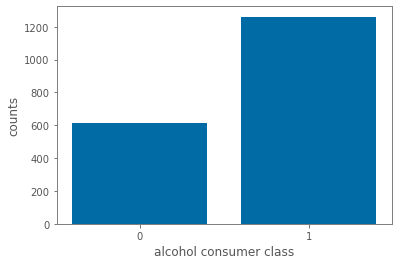

In [1608]:
# plot class imbalance
#class labels
x = data_mod.alcohol_user.value_counts().sort_index().index
#counts for differenct classes
height = data_mod.alcohol_user.value_counts().sort_index().values
plt.bar(x, height)
plt.xlabel('alcohol consumer class')
plt.ylabel('counts')
plt.xticks(ticks = [0,1])
print(f'Class 0 represents {round(height[0]/len(data_mod)*100,2)}%, class 1 represents {round(height[1]/len(data_mod)*100,2)}%.')

In [1419]:
# use oversampling with SMOTE to generate more instances of underrepresenteted class
# https://github.com/scikit-learn-contrib/imbalanced-learn

from imblearn.over_sampling import RandomOverSampler, SMOTE

#initate SMOTE class, resample all classes but the majority class, using 5 nearest neighbors for construction
sm = SMOTE(sampling_strategy='not majority', k_neighbors=5, random_state = rseed)

X_res, y_res = sm.fit_resample(X_lr, y_lr)
print(f'Resampled dataset contains the following number of instances per class: {Counter(y_res)}')


Resampled dataset contains the following number of instances per class: Counter({1: 1261, 0: 1261})


In [1420]:
# train test split for ressampled data
X_train_res, X_test_res, y_train_res, y_test_res = \
train_test_split(X_res, y_res, test_size = 0.25, random_state = rseed) 

In [1421]:
# compare to dummy classifier

dummy_clf = DummyClassifier(strategy = 'stratified')
y_train_dummies = cross_val_predict(dummy_clf, X_train_res, y_train_res, cv = 5)
print(metrics.confusion_matrix(y_train_res,y_train_dummies))
print(metrics.classification_report(y_train_res,y_train_dummies))

[[450 498]
 [492 451]]
              precision    recall  f1-score   support

           0       0.48      0.47      0.48       948
           1       0.48      0.48      0.48       943

    accuracy                           0.48      1891
   macro avg       0.48      0.48      0.48      1891
weighted avg       0.48      0.48      0.48      1891



These are the base statistics for a "stupid", inaccurate model. Anything that is better than that should be "workable".

In [1422]:
# KNN model with resampled data
knn = KNeighborsClassifier()
y_train_pred_res = cross_val_predict(knn,X_train_res, y_train_res)
print(metrics.confusion_matrix(y_train_res,y_train_pred_res))
print(metrics.classification_report(y_train_res,y_train_pred_res))

[[739 209]
 [450 493]]
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       948
           1       0.70      0.52      0.60       943

    accuracy                           0.65      1891
   macro avg       0.66      0.65      0.65      1891
weighted avg       0.66      0.65      0.65      1891



In [1423]:
knn = KNeighborsClassifier( weights = 'distance')
y_train_pred_res = cross_val_predict(knn,X_train_res, y_train_res)
print(metrics.confusion_matrix(y_train_res,y_train_pred_res))
print(metrics.classification_report(y_train_res,y_train_pred_res))

[[805 143]
 [450 493]]
              precision    recall  f1-score   support

           0       0.64      0.85      0.73       948
           1       0.78      0.52      0.62       943

    accuracy                           0.69      1891
   macro avg       0.71      0.69      0.68      1891
weighted avg       0.71      0.69      0.68      1891



That looks a bit better but now the recall for class 2 is far from great.

In [1424]:
#Log regression with resampled data
y_train_pred_res = cross_val_predict(LogReg_clf,X_train_res, y_train_res, cv = 5)
print(metrics.confusion_matrix(y_train_res,y_train_pred_res))
print(metrics.classification_report(y_train_res,y_train_pred_res))

[[576 372]
 [388 555]]
              precision    recall  f1-score   support

           0       0.60      0.61      0.60       948
           1       0.60      0.59      0.59       943

    accuracy                           0.60      1891
   macro avg       0.60      0.60      0.60      1891
weighted avg       0.60      0.60      0.60      1891



In [1425]:
# SGD with resampled data
y_train_pred_res = cross_val_predict(SGD_clf,X_train_res, y_train_res, cv = 5)
print(metrics.confusion_matrix(y_train_res,y_train_pred_res))
print(metrics.classification_report(y_train_res,y_train_pred_res))

[[452 496]
 [394 549]]
              precision    recall  f1-score   support

           0       0.53      0.48      0.50       948
           1       0.53      0.58      0.55       943

    accuracy                           0.53      1891
   macro avg       0.53      0.53      0.53      1891
weighted avg       0.53      0.53      0.53      1891



In [1426]:
# Naive Bayes with resampled data

y_train_pred_res = cross_val_predict(GB_clf,X_train_res, y_train_res, cv = 5)
print(metrics.confusion_matrix(y_train_res,y_train_pred_res))
print(metrics.classification_report(y_train_res,y_train_pred_res))

[[184 764]
 [104 839]]
              precision    recall  f1-score   support

           0       0.64      0.19      0.30       948
           1       0.52      0.89      0.66       943

    accuracy                           0.54      1891
   macro avg       0.58      0.54      0.48      1891
weighted avg       0.58      0.54      0.48      1891



In [1427]:
# test decission tree on resampled data
y_train_pred_res = cross_val_predict(tree_clf,X_train_res, y_train_res, cv = 5)
print(metrics.confusion_matrix(y_train_res,y_train_pred_res))
print(metrics.classification_report(y_train_res,y_train_pred_res))

[[634 314]
 [333 610]]
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       948
           1       0.66      0.65      0.65       943

    accuracy                           0.66      1891
   macro avg       0.66      0.66      0.66      1891
weighted avg       0.66      0.66      0.66      1891



In [1428]:
# test resampled data with random forest classifier
y_train_pred_res = cross_val_predict(rfc,X_train_res, y_train_res, cv = 5)
print(metrics.confusion_matrix(y_train_res,y_train_pred_res))
print(metrics.classification_report(y_train_res,y_train_pred_res))

[[694 254]
 [226 717]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       948
           1       0.74      0.76      0.75       943

    accuracy                           0.75      1891
   macro avg       0.75      0.75      0.75      1891
weighted avg       0.75      0.75      0.75      1891



In [1429]:
# SVM classifier for resampled data
y_train_pred_res = cross_val_predict(SVC_clf,X_train_res, y_train_res, cv = 5)
print(metrics.confusion_matrix(y_train_res,y_train_pred_res))
print(metrics.classification_report(y_train_res,y_train_pred_res))

[[651 297]
 [343 600]]
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       948
           1       0.67      0.64      0.65       943

    accuracy                           0.66      1891
   macro avg       0.66      0.66      0.66      1891
weighted avg       0.66      0.66      0.66      1891



In [1462]:
# Classification with Adaboost
from sklearn.ensemble import AdaBoostClassifier
adab_clf = AdaBoostClassifier(random_state=rseed)
y_pred = cross_val_predict(adab_clf,X_train_res, y_train_res, cv = 5)
print(metrics.confusion_matrix(y_train_res,y_train_pred_res))
print(metrics.classification_report(y_train_res,y_pred))

[[678 270]
 [252 691]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       948
           1       0.67      0.68      0.68       943

    accuracy                           0.68      1891
   macro avg       0.68      0.68      0.68      1891
weighted avg       0.68      0.68      0.68      1891



In [1463]:
# Classification with Adaboost using Log regression as base estimator
from sklearn.ensemble import AdaBoostClassifier
adab_clf_log = AdaBoostClassifier(base_estimator= LogReg_clf, random_state=rseed)
y_pred = cross_val_predict(adab_clf_log,X_train_res, y_train_res, cv = 5)
print(metrics.confusion_matrix(y_train_res,y_train_pred_res))
print(metrics.classification_report(y_train_res,y_pred))

[[678 270]
 [252 691]]
              precision    recall  f1-score   support

           0       0.62      0.40      0.48       948
           1       0.55      0.75      0.64       943

    accuracy                           0.57      1891
   macro avg       0.58      0.57      0.56      1891
weighted avg       0.58      0.57      0.56      1891



In [1433]:
# Classification with XGBoost
import xgboost as xgb
#initiate model
xgb_clf = xgb.XGBClassifier()
y_pred = cross_val_predict(xgb_clf,X_train_res, y_train_res, cv = 5)
print(metrics.confusion_matrix(y_train_res,y_train_pred_res))
print(metrics.classification_report(y_train_res,y_pred))

[[651 297]
 [343 600]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       948
           1       0.70      0.77      0.73       943

    accuracy                           0.72      1891
   macro avg       0.73      0.72      0.72      1891
weighted avg       0.73      0.72      0.72      1891



Performance of classifiers on oversampled data (recall average):   
    Random Forest > XGB > KNN > Tree > SVC

### Try random forrest and XGBoost with viewer variables

In [1434]:
# use only personality traits and age for classification
data_cut = data_lr.copy()
data_cut.drop(['Country', 'Ethnicity', 'Gender'], axis = 1, inplace = True)
data_cut.head(1)

,Age,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA,alcohol_user
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,1


In [1435]:
# split into X and y and train, test split
X2 = data_cut.iloc[:,:7].values
y2 = data_cut.alcohol_user.values

# train, test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2 )

# Oversampling
X2_res, y2_res = sm.fit_resample(X2, y2)

X2_train_res, X2_test_res, y2_train_res, y2_test_res = train_test_split(X2_res, y2_res, test_size = 0.25, random_state = rseed) 

In [1436]:
# test random forest classifier on resampled data containing only personality traits
y_train_pred_res = cross_val_predict(rfc,X2_train_res, y2_train_res, cv = 5)
print(metrics.confusion_matrix(y2_train_res,y_train_pred_res))
print(metrics.classification_report(y2_train_res,y_train_pred_res))

[[678 270]
 [252 691]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       948
           1       0.72      0.73      0.73       943

    accuracy                           0.72      1891
   macro avg       0.72      0.72      0.72      1891
weighted avg       0.72      0.72      0.72      1891



This model is almost as good as with all features. We will still continue with all features.

In [1437]:
y_pred = cross_val_predict(xgb_clf,X2_train_res, y2_train_res, cv = 5)
print(metrics.confusion_matrix(y2_train_res,y_pred))
print(metrics.classification_report(y2_train_res,y_pred))

[[647 301]
 [289 654]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       948
           1       0.68      0.69      0.69       943

    accuracy                           0.69      1891
   macro avg       0.69      0.69      0.69      1891
weighted avg       0.69      0.69      0.69      1891



Still performs ok, but we will continue with random forrest classifier.

## Hyperparameter tuning of random forrest classifier

In [1438]:
params = {'n_estimators':[50,100,200,500, 750, 1000,1250, 1500, 1750, 2000, 2500],
          'criterion' : ['gini', 'entropy'],
          'max_depth': [2,3,4,5,6,7,8,9,10, 15, 20],
          'min_samples_split' : [2,4,6,8,10],
          'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
          'max_features' : ['sqrt', 'log2']
          }
#make scorer for multilabel problem
# use macro average of recall as scoring metrics
scorer = metrics.make_scorer(metrics.recall_score, average = 'macro')

grid_rand_for = RandomizedSearchCV(RandomForestClassifier(), param_distributions = params, n_jobs = -1, 
                                   cv = 5, verbose = 5, n_iter = 0, scoring=scorer)
grid_rand_for.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [50, 100, 200, 500, 750,
                                                         1000, 1250, 1500, 1750,
                                                         2000, 2500]},
                   scoring=make_scorer(recall_score, average=macro), verbose=5)

In [1439]:
# print best score and best parameters
print(grid_rand_for.best_score_)
print(grid_rand_for.best_params_)

0.7477803847680666
{'n_estimators': 2000, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'entropy'}


In [1440]:
# save best parameters
best_params = grid_rand_for.best_estimator_
# predict y_values for X_test
y_predict_test = best_params.predict(X_test)
print(metrics.confusion_matrix(y_test,y_predict_test))
print(metrics.classification_report(y_test,y_predict_test))

[[203  43]
 [ 25 480]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       246
           1       0.92      0.95      0.93       505

    accuracy                           0.91       751
   macro avg       0.90      0.89      0.90       751
weighted avg       0.91      0.91      0.91       751



In [1441]:
# test model on training data
y_predict_train = best_params.predict(X_train)
print(metrics.confusion_matrix(y_train,y_predict_train))
print(metrics.classification_report(y_train,y_predict_train))

[[304  66]
 [ 43 713]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       370
           1       0.92      0.94      0.93       756

    accuracy                           0.90      1126
   macro avg       0.90      0.88      0.89      1126
weighted avg       0.90      0.90      0.90      1126



This model performs really well on the test data, even though the data was never seen by the algorithm. 

In [1445]:
# identify important features for decission trees in random forrest
feat_importance = best_params.feature_importances_
features = data_lr.iloc[:,:len(features)].columns 
feature_importance_rfc_simple = pd.DataFrame({'feature': features,                  
                                              'importance': feat_importance}).sort_values('importance', ascending = False)
feature_importance_rfc_simple

,feature,importance
2,Education,0.123648
6,Escore,0.110531
8,Ascore,0.104464
9,Cscore,0.101813
7,Oscore,0.100014
5,Nscore,0.099586
11,SS,0.090070
10,Impulsive,0.072615
0,Age,0.064611
3,Country,0.055186


## Modeling of Heroin addiction

In [1292]:
data_mod.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA,alcohol_user
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,2
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,2
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,2
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0,1
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0,1


Define heroin users. As Heroin consumption even once a month is a bigger problem than alcohol consumption, the definition of active user will be broader than for alcohol. Moreover, we will add a "rare user" group of responders who responded using Heroin once a year. 
* class 0: non_user : CL0, CL1, CL2 
* class 1:  rare user: CL3
* class 2:  active_user: CL4, CL5, CL6

Counter({0: 1759, 1: 65, 2: 53})

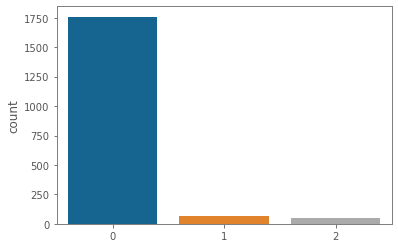

In [1629]:
y_heroin = data_mod['Heroin'].copy()
X_heroin = data_mod.iloc[:,:12].values
y_heroin.replace(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], [0,0,0,1,2,2,2], inplace = True)
y_heroin = y_heroin.values
sns.countplot(y_heroin)
Counter(y_heroin)

The label is very unbalanced. We will still try to fit the data without oversampling.

In [1541]:
#train test split
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_heroin, y_heroin, test_size = 0.4, stratify = y_heroin,
                                                           shuffle = True, random_state = rseed)

In [1542]:
# make a list of classifiers 
classifiers = [dummy_clf, LogReg_clf, SGD_clf, GB_clf, knn_clf, SVC_clf, tree_clf, rfc, adab_clf, adab_clf_log, xgb_clf ]

In [1543]:
for _ in classifiers:
    print(_)

DummyClassifier(strategy='most_frequent')
LogisticRegression(class_weight='balanced', random_state=420)
SGDClassifier(class_weight='balanced', random_state=420)
GaussianNB(priors=[0.3285968028419183, 0.6714031971580817])
KNeighborsClassifier(weights='distance')
SVC(class_weight='balanced')
DecisionTreeClassifier(class_weight='balanced')
RandomForestClassifier(class_weight='balanced')
AdaBoostClassifier(random_state=420)
AdaBoostClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                     random_state=420),
                   random_state=420)
XGBClassifier()


In [1544]:
#change priors for Heroin and innitiate GB classifier with new priors
heroin_class_count = Counter(y_heroin)
heroin_priors = [heroin_class_count[i]/len(y_heroin) for i in range(len(heroin_class_count))]
GB_clf_h = GaussianNB(priors = heroin_priors )
dumm_clf = DummyClassifier(strategy = 'most_frequent')

In [1545]:
heroin_class_count

Counter({0: 1759, 1: 65, 2: 53})

In [1546]:
# make a list of classifiers 
classifiers = [(dummy_clf,'dummy_clf'), (LogReg_clf,'LogReg_clf'), (SGD_clf,'SGD_clf'), (GB_clf_h,'GB_clf_h'),
               (knn_clf,'knn_clf'), (SVC_clf,'SVC_clf'), (tree_clf,'tree_clf'), (rfc,'rfc'), (adab_clf,'adab_clf'), 
               (adab_clf_log,'adab_clf_log'), (xgb_clf,'xgb_clf') ]

In [1548]:

for classifier,name in classifiers:
    y_pred_h = cross_val_predict(classifier, X_train_h, y_train_h, cv=5)
    recall = metrics.recall_score(y_train_h, y_pred_h, average = 'macro')
    print(f' Weighted recall score for classifier {name :15}: {round(recall, 3)}')
    

 Weighted recall score for classifier dummy_clf      : 0.333
 Weighted recall score for classifier LogReg_clf     : 0.525
 Weighted recall score for classifier SGD_clf        : 0.525
 Weighted recall score for classifier GB_clf_h       : 0.491
 Weighted recall score for classifier knn_clf        : 0.33
 Weighted recall score for classifier SVC_clf        : 0.538
 Weighted recall score for classifier tree_clf       : 0.391
 Weighted recall score for classifier rfc            : 0.333
 Weighted recall score for classifier adab_clf       : 0.374
 Weighted recall score for classifier adab_clf_log   : 0.333
 Weighted recall score for classifier xgb_clf        : 0.374


In [1514]:
y_pred_h = cross_val_predict(LogReg_clf, X_train_h, y_train_h, cv=5)
print(metrics.confusion_matrix(y_train_h, y_pred_h,))
print(metrics.classification_report(y_train_h, y_pred_h,))

[[715 217 123]
 [ 13  13  13]
 [  2  12  18]]
              precision    recall  f1-score   support

           0       0.98      0.68      0.80      1055
           1       0.05      0.33      0.09        39
           2       0.12      0.56      0.19        32

    accuracy                           0.66      1126
   macro avg       0.38      0.52      0.36      1126
weighted avg       0.92      0.66      0.76      1126



In [1515]:
y_pred_h = cross_val_predict(SVC_clf, X_train_h, y_train_h, cv=5)
print(metrics.confusion_matrix(y_train_h, y_pred_h,))
print(metrics.classification_report(y_train_h, y_pred_h,))

[[846 139  70]
 [ 16  17   6]
 [ 10  10  12]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1055
           1       0.10      0.44      0.17        39
           2       0.14      0.38      0.20        32

    accuracy                           0.78      1126
   macro avg       0.40      0.54      0.41      1126
weighted avg       0.92      0.78      0.83      1126



In [1516]:
y_pred_h = cross_val_predict(SGD_clf, X_train_h, y_train_h, cv=5)
print(metrics.confusion_matrix(y_train_h, y_pred_h,))
print(metrics.classification_report(y_train_h, y_pred_h,))

[[811 171  73]
 [ 13  18   8]
 [  7  14  11]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1055
           1       0.09      0.46      0.15        39
           2       0.12      0.34      0.18        32

    accuracy                           0.75      1126
   macro avg       0.39      0.52      0.40      1126
weighted avg       0.92      0.75      0.82      1126



In [1630]:
X_res_h, y_res_h = sm.fit_resample(X_heroin, y_heroin)
#Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_res_h, y_res_h, test_size = 0.25, random_state = rseed) 

In [1632]:
heroin_class_count = Counter(y_heroin)
heroin_priors = [heroin_class_count[i]/len(y_heroin) for i in range(len(heroin_class_count))]
GB_clf_h = GaussianNB(priors = heroin_priors )
dumm_clf = DummyClassifier(strategy = 'most_frequent')

classifiers = [(dummy_clf,'dummy_clf'), (LogReg_clf,'LogReg_clf'), (SGD_clf,'SGD_clf'), (GB_clf_h,'GB_clf_h'),
               (knn_clf,'knn_clf'), (SVC_clf,'SVC_clf'), (tree_clf,'tree_clf'), (rfc,'rfc'), (adab_clf,'adab_clf'), 
               (adab_clf_log,'adab_clf_log'), (xgb_clf,'xgb_clf') ]

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_res_h, y_res_h, test_size = 0.4, stratify = y_res_h,
                                                           shuffle = True, random_state = rseed)

for classifier,name in classifiers:
    y_pred_h = cross_val_predict(classifier, X_train_h, y_train_h, cv=5)
    recall = metrics.recall_score(y_train_h, y_pred_h, average = 'macro')
    print(f'Recall score for classifier {name :15}: {round(recall, 3)}')

Recall score for classifier dummy_clf      : 0.333
Recall score for classifier LogReg_clf     : 0.619
Recall score for classifier SGD_clf        : 0.583
Recall score for classifier GB_clf_h       : 0.563
Recall score for classifier knn_clf        : 0.9
Recall score for classifier SVC_clf        : 0.914
Recall score for classifier tree_clf       : 0.891
Recall score for classifier rfc            : 0.963
Recall score for classifier adab_clf       : 0.681
Recall score for classifier adab_clf_log   : 0.618
Recall score for classifier xgb_clf        : 0.904


In [1634]:
y_pred_h = cross_val_predict(SVC_clf, X_train_h, y_train_h, cv=5)
print(metrics.confusion_matrix(y_train_h, y_pred_h,))
print(metrics.classification_report(y_train_h, y_pred_h,))

[[ 841  119   95]
 [   4 1012   39]
 [   2   13 1041]]
              precision    recall  f1-score   support

           0       0.99      0.80      0.88      1055
           1       0.88      0.96      0.92      1055
           2       0.89      0.99      0.93      1056

    accuracy                           0.91      3166
   macro avg       0.92      0.91      0.91      3166
weighted avg       0.92      0.91      0.91      3166



#### What if we have only two classes?

Counter({0: 1759, 1: 118})

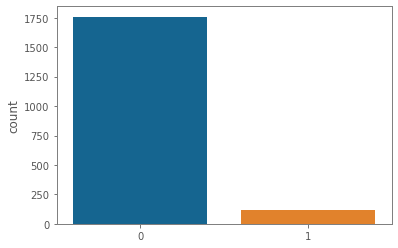

In [1620]:
y_heroin = data_mod['Heroin'].copy()
X_heroin = data_mod.iloc[:,:12].values
y_heroin.replace(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], [0,0,0,1,1,1,1], inplace = True)
y_heroin = y_heroin.values
sns.countplot(y_heroin)
Counter(y_heroin)

In [1627]:
# innitiate and store classifiers

heroin_class_count = Counter(y_heroin)
heroin_priors = [heroin_class_count[i]/len(y_heroin) for i in range(len(heroin_class_count))]
GB_clf_h = GaussianNB(priors = heroin_priors )
dumm_clf = DummyClassifier(strategy = 'most_frequent')

classifiers = [(dummy_clf,'dummy_clf'), (LogReg_clf,'LogReg_clf'), (SGD_clf,'SGD_clf'), (GB_clf_h,'GB_clf_h'),
               (knn_clf,'knn_clf'), (SVC_clf,'SVC_clf'), (tree_clf,'tree_clf'), (rfc,'rfc'), (adab_clf,'adab_clf'), 
               (adab_clf_log,'adab_clf_log'), (xgb_clf,'xgb_clf') ]

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_heroin, y_heroin, test_size = 0.4, stratify = y_heroin,
                                                           shuffle = True, random_state = rseed)

for classifier,name in classifiers:
    y_pred_h = cross_val_predict(classifier, X_train_h, y_train_h, cv=5)
    recall = metrics.recall_score(y_train_h, y_pred_h, average = 'macro')
    print(f'Recall score for classifier {name :15}: {round(recall, 3)}')

Recall score for classifier dummy_clf      : 0.5
Recall score for classifier LogReg_clf     : 0.755
Recall score for classifier SGD_clf        : 0.699
Recall score for classifier GB_clf_h       : 0.658
Recall score for classifier knn_clf        : 0.517
Recall score for classifier SVC_clf        : 0.65
Recall score for classifier tree_clf       : 0.501
Recall score for classifier rfc            : 0.499
Recall score for classifier adab_clf       : 0.503
Recall score for classifier adab_clf_log   : 0.5
Recall score for classifier xgb_clf        : 0.498


In [1573]:
y_pred_h = cross_val_predict(LogReg_clf, X_train_h, y_train_h, cv=5)
print(metrics.confusion_matrix(y_train_h, y_pred_h,))
print(metrics.classification_report(y_train_h, y_pred_h,))

[[760 295]
 [ 15  56]]
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1055
           1       0.16      0.79      0.27        71

    accuracy                           0.72      1126
   macro avg       0.57      0.75      0.55      1126
weighted avg       0.93      0.72      0.79      1126



In [1574]:
y_pred_h = cross_val_predict(rfc, X_train_h, y_train_h, cv=5)
print(metrics.confusion_matrix(y_train_h, y_pred_h,))
print(metrics.classification_report(y_train_h, y_pred_h,))

[[1053    2]
 [  70    1]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1055
           1       0.33      0.01      0.03        71

    accuracy                           0.94      1126
   macro avg       0.64      0.51      0.50      1126
weighted avg       0.90      0.94      0.91      1126



In [1611]:
# Hyperparameter tunine
params = {'penalty': ['l1', 'l2', 'elasticnet'], 'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
         'solver': ['liblinear', 'saga'],
         'max_iter': [100,250,500,1000,2000],
         'warm_start': [False, True],
         'class_weight': [None, 'balanced', {0:1, 1:10}, {0:1, 1:100}, {0:0.1, 1:1}, {0:0.1, 1:10}, {0:0.1, 1:100},
                          {0:0.01, 1:1}, {0:0.01, 1:10}, {0:0.01, 1:100}]
         }
#log_reg_clf = LogisticRegression()
#grid_log_h = GridSearchCV(log_reg_clf, param_grid = params, scoring = 'recall')
#grid_log_h.fit(X_train_h, y_pred_h);

In [1599]:
grid_log_h.best_score_

0.996448377581121

In [1607]:
grid_log_h.best_params_

{'C': 1e-05,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear',
 'warm_start': False}

In [1600]:
best_params_log = grid_log_h.best_estimator_

In [1601]:
y_pred = best_params_log.predict(X_test_h)

In [1602]:
metrics.confusion_matrix(y_test_h, y_pred)

array([[704,   0],
       [ 47,   0]])

In [1603]:
print(metrics.classification_report(y_test_h, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       704
           1       0.00      0.00      0.00        47

    accuracy                           0.94       751
   macro avg       0.47      0.50      0.48       751
weighted avg       0.88      0.94      0.91       751



/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Oversampling for Heroion classification

In [1621]:
sm = SMOTE(sampling_strategy='not majority', k_neighbors=5, random_state = rseed)

X_res_h, y_res_h = sm.fit_resample(X_heroin, y_heroin)
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_res_h, y_res_h, test_size = 0.25, random_state = rseed) 

In [1623]:
y_train_dummies = cross_val_predict(dummy_clf, Xh_train, yh_train, cv = 5)
print(metrics.confusion_matrix(yh_train,y_train_dummies))
print(metrics.classification_report(yh_train,y_train_dummies))

[[   0 1314]
 [   0 1324]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.50      1.00      0.67      1324

    accuracy                           0.50      2638
   macro avg       0.25      0.50      0.33      2638
weighted avg       0.25      0.50      0.34      2638



/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [1624]:
for classifier,name in classifiers:
    y_pred = cross_val_predict(classifier, Xh_train, yh_train, cv=5)
    recall = metrics.recall_score(yh_train, y_pred, average = 'macro')
    print(f'Recall score for classifier {name :15}: {round(recall, 3)}')

 Weighted recall score for classifier dummy_clf      : 0.5
 Weighted recall score for classifier LogReg_clf     : 0.79
 Weighted recall score for classifier SGD_clf        : 0.783
 Weighted recall score for classifier GB_clf_h       : 0.756
 Weighted recall score for classifier knn_clf        : 0.873
 Weighted recall score for classifier SVC_clf        : 0.899
 Weighted recall score for classifier tree_clf       : 0.905
 Weighted recall score for classifier rfc            : 0.96
 Weighted recall score for classifier adab_clf       : 0.9
 Weighted recall score for classifier adab_clf_log   : 0.777
 Weighted recall score for classifier xgb_clf        : 0.934


In [1626]:
y_train_dummies = cross_val_predict(SVC_clf, Xh_train, yh_train, cv = 5)
print(metrics.confusion_matrix(yh_train,y_train_dummies))
print(metrics.classification_report(yh_train,y_train_dummies))

[[1078  236]
 [  30 1294]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1314
           1       0.85      0.98      0.91      1324

    accuracy                           0.90      2638
   macro avg       0.91      0.90      0.90      2638
weighted avg       0.91      0.90      0.90      2638



In [1628]:

illegal_drugs

['Amphet',
 'Amyl',
 'Benzos',
 'Cannabis',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'Legalh',
 'LSD',
 'Meth',
 'Shrooms',
 'Nicotine',
 'VSA']

In [1661]:
X_drug = data_mod.iloc[:,:12].values
best_score = []
classifiers = [(dummy_clf,'dummy_clf'), (LogReg_clf,'LogReg_clf'), (SGD_clf,'SGD_clf'),
               (knn_clf,'knn_clf'), (SVC_clf,'SVC_clf'), (tree_clf,'tree_clf'), (rfc,'rfc'), (adab_clf,'adab_clf'), 
               (adab_clf_log,'adab_clf_log'), (xgb_clf,'xgb_clf') ]

for drug in illegal_drugs:
    y_drug = data_mod[drug].copy()
    # we will only consider people at risk if they used an illegal drug in the past year
    y_drug.replace(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], [0,0,0,1,1,1,1], inplace = True)
    y_drug = y_drug.values
    X_drug_s, y_drug_s = sm.fit_resample(X_drug, y_drug)
    # train, test split
    X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X_drug_s, y_drug_s, random_state = rseed)
    #get priors for Gaussian Naive Bayes
    class_count = Counter(y_train_drug)
    priors = [class_count[i]/len(y_train_drug) for i in range(len(class_count))]
    GB_clf = GaussianNB(priors = priors )
    # add GB classifier to classifiers List
    classifiers = classifiers + [(GB_clf, 'GB_clf')]
    
    # innitiate list to store scores
    scores = []

    for classifier, name in classifiers:
        y_pred = cross_val_predict(classifier, X_train_drug, y_train_drug, cv=5)
        recall = metrics.recall_score(y_train_drug, y_pred, average = 'macro')
        scores.append((drug, name, round(recall,2)))
    
    scores.sort(key = lambda x : x[-1])
    #print(drug, scores)
    best_score.append(scores[-1])
    best_score.append(scores[-2])
    best_score.append(scores[-3])


In [1662]:
for pair in best_score:
    print(pair)

('Amphet', 'rfc', 0.86)
('Amphet', 'xgb_clf', 0.84)
('Amphet', 'knn_clf', 0.83)
('Amyl', 'rfc', 0.96)
('Amyl', 'xgb_clf', 0.94)
('Amyl', 'tree_clf', 0.89)
('Benzos', 'rfc', 0.82)
('Benzos', 'xgb_clf', 0.8)
('Benzos', 'knn_clf', 0.78)
('Cannabis', 'xgb_clf', 0.83)
('Cannabis', 'adab_clf_log', 0.83)
('Cannabis', 'rfc', 0.83)
('Coke', 'rfc', 0.86)
('Coke', 'xgb_clf', 0.83)
('Coke', 'adab_clf', 0.8)
('Crack', 'rfc', 0.97)
('Crack', 'xgb_clf', 0.95)
('Crack', 'tree_clf', 0.94)
('Ecstasy', 'rfc', 0.84)
('Ecstasy', 'xgb_clf', 0.82)
('Ecstasy', 'adab_clf', 0.8)
('Heroin', 'rfc', 0.96)
('Heroin', 'xgb_clf', 0.93)
('Heroin', 'tree_clf', 0.91)
('Ketamine', 'rfc', 0.93)
('Ketamine', 'xgb_clf', 0.9)
('Ketamine', 'tree_clf', 0.87)
('Legalh', 'rfc', 0.85)
('Legalh', 'xgb_clf', 0.83)
('Legalh', 'adab_clf', 0.81)
('LSD', 'xgb_clf', 0.89)
('LSD', 'rfc', 0.89)
('LSD', 'adab_clf', 0.87)
('Meth', 'rfc', 0.9)
('Meth', 'xgb_clf', 0.88)
('Meth', 'adab_clf', 0.84)
('Shrooms', 'rfc', 0.88)
('Shrooms', 'xgb_clf'

In [1645]:
priors

[0.9371337240277038, 0.03462972828982419, 0.02823654768247203]